In [ ]:
!pip install "numpy<2.0" scikit-learn pmdarima statsmodels joblib -U

In [ ]:
# !pip install scikit-learn
# importando bibliotecas
# Biliotecas para manipulação de dados pandas
import pandas as pd
# Bilioteca para manipulação de arrays python
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta
import time
# Função para distribuir aleatoriamente dados usand scikilearn
from sklearn.model_selection import train_test_split
#usada para o pré-processamento de daddos, minmax e standard para dimensionar e padronizar e o onehot para codificar variáveis em formato numérico
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
# Pipe line sklearn
from sklearn.pipeline import Pipeline
#classificador redes neurais com MLP
from sklearn.neural_network import MLPClassifier
# Graficos em python
import matplotlib.pyplot as plt
# Importando metricas para aferição do modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
# Platando curva ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.impute import SimpleImputer

#importa metricas
from sklearn import metrics

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import time

from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import GridSearchCV
import joblib


In [ ]:
# Lista para armazenar os tempos de inferência
tempos_inferencia = []
num_repeticoes = 1000 # Número de vezes para repetir a medição

In [ ]:
data = pd.read_csv('path/CIC171823.csv', low_memory=False)

In [ ]:
data.head()

,Fwd Seg Size Min,Active Mean,Active Min,Dst Port_SMA_6,Dst Port_EMA_6,Dst Port_SMA_9,Dst Port_EMA_9,Dst Port_SMA_12,Dst Port_EMA_12,Bwd Pkt Len Max_SMA_3,...,PSH Flag Cnt_entropy_j20,PSH Flag Cnt_entropy_j30,PSH Flag Cnt_entropy_j40,PSH Flag Cnt_entropy_j50,ACK Flag Cnt_entropy_j10,ACK Flag Cnt_entropy_j20,ACK Flag Cnt_entropy_j30,ACK Flag Cnt_entropy_j40,ACK Flag Cnt_entropy_j50,Label
0,20.0,0.0,0.0,80.000000,80.000000,80.000000,80.0000,80.000000,80.000000,6.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,32.0,0.0,0.0,234.500000,168.285714,234.500000,141.8000,234.500000,127.538462,84.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,32.0,0.0,0.0,185.666667,145.346939,185.666667,131.0400,185.666667,121.455621,581.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,32.0,0.0,0.0,236.500000,214.962099,236.500000,182.6320,236.500000,162.616295,1602.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,32.0,0.0,0.0,206.800000,178.687214,206.800000,163.7056,206.800000,151.136865,2073.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
print(data.columns[50:])

Index(['Bwd Seg Size Avg_EMA_9', 'Bwd Seg Size Avg_SMA_12',
       'Bwd Seg Size Avg_EMA_12', 'Fwd Seg Size Min_SMA_3',
       'Fwd Seg Size Min_EMA_3', 'Fwd Seg Size Min_SMA_6',
       'Fwd Seg Size Min_EMA_6', 'Fwd Seg Size Min_SMA_9',
       'Fwd Seg Size Min_EMA_9', 'Fwd Seg Size Min_SMA_12',
       'Fwd Seg Size Min_EMA_12', 'Active Mean_SMA_3', 'Active Mean_EMA_3',
       'Active Mean_SMA_6', 'Active Mean_EMA_6', 'Active Mean_SMA_9',
       'Active Mean_EMA_9', 'Active Mean_SMA_12', 'Active Mean_EMA_12',
       'Active Std_EMA_3', 'Active Std_SMA_6', 'Active Std_EMA_6',
       'Active Std_SMA_9', 'Active Std_EMA_9', 'Active Std_SMA_12',
       'Active Std_EMA_12', 'Active Max_SMA_6', 'Active Max_EMA_6',
       'Active Max_SMA_9', 'Active Max_EMA_9', 'Active Max_SMA_12',
       'Active Max_EMA_12', 'Active Min_SMA_3', 'Active Min_EMA_3',
       'Active Min_SMA_6', 'Active Min_EMA_6', 'Active Min_SMA_9',
       'Active Min_EMA_9', 'Active Min_SMA_12', 'Active Min_EMA_12',
       'P

In [ ]:
data['Label'].value_counts()

,count
Label,
Benign,16489
DoS attacks-SlowHTTPTest,16489
DoS attacks-Slowloris,16489
DDoS attacks-Slowloris,16489


In [ ]:
dt = data.copy()
dt.head()

,Fwd Seg Size Min,Active Mean,Active Min,Dst Port_SMA_6,Dst Port_EMA_6,Dst Port_SMA_9,Dst Port_EMA_9,Dst Port_SMA_12,Dst Port_EMA_12,Bwd Pkt Len Max_SMA_3,...,PSH Flag Cnt_entropy_j20,PSH Flag Cnt_entropy_j30,PSH Flag Cnt_entropy_j40,PSH Flag Cnt_entropy_j50,ACK Flag Cnt_entropy_j10,ACK Flag Cnt_entropy_j20,ACK Flag Cnt_entropy_j30,ACK Flag Cnt_entropy_j40,ACK Flag Cnt_entropy_j50,Label
0,20.0,0.0,0.0,80.000000,80.000000,80.000000,80.0000,80.000000,80.000000,6.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,32.0,0.0,0.0,234.500000,168.285714,234.500000,141.8000,234.500000,127.538462,84.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,32.0,0.0,0.0,185.666667,145.346939,185.666667,131.0400,185.666667,121.455621,581.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,32.0,0.0,0.0,236.500000,214.962099,236.500000,182.6320,236.500000,162.616295,1602.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,32.0,0.0,0.0,206.800000,178.687214,206.800000,163.7056,206.800000,151.136865,2073.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
label = dt['Label']

In [ ]:
print(f'Linhas: {dt.shape[0]}')
print(f'Colunas: {dt.shape[1]}')

Linhas: 65956
Colunas: 101


In [ ]:
# Obter rótulos das classes

names = ['Tráfego_normal', 'DoS attacks-Slowloris', 'DoS attacks-SlowHTTPTest', 'DDoS attacks-Slowloris']
# Map string labels to numerical values before getting unique values
label_map = {'Benign': 0, 'DoS attacks-Slowloris': 1, 'DoS attacks-SlowHTTPTest': 2, 'DDoS attacks-Slowloris': 3}
dt['Label'] = dt['Label'].map(label_map)

classes = [names[i] for i in dt['Label'].unique()]
index = np.arange(len(classes))
classes

['Tráfego_normal',
 'DoS attacks-SlowHTTPTest',
 'DoS attacks-Slowloris',
 'DDoS attacks-Slowloris']

In [ ]:

dt['Label'] = dt['Label'].replace(['Benign'], 0)
dt['Label'] = dt['Label'].replace(['DoS attacks-Slowloris'], 1)
dt['Label'] = dt['Label'].replace(['DoS attacks-SlowHTTPTest'], 2)
dt['Label'] = dt['Label'].replace(['DDoS attacks-Slowloris'], 3)
dt['Label'].value_counts()

,count
Label,
0,16489
2,16489
1,16489
3,16489


In [ ]:
y = dt['Label']
x_data = data.drop(['Label'],axis=1)
x_data.head()

,Fwd Seg Size Min,Active Mean,Active Min,Dst Port_SMA_6,Dst Port_EMA_6,Dst Port_SMA_9,Dst Port_EMA_9,Dst Port_SMA_12,Dst Port_EMA_12,Bwd Pkt Len Max_SMA_3,...,PSH Flag Cnt_entropy_j10,PSH Flag Cnt_entropy_j20,PSH Flag Cnt_entropy_j30,PSH Flag Cnt_entropy_j40,PSH Flag Cnt_entropy_j50,ACK Flag Cnt_entropy_j10,ACK Flag Cnt_entropy_j20,ACK Flag Cnt_entropy_j30,ACK Flag Cnt_entropy_j40,ACK Flag Cnt_entropy_j50
0,20.0,0.0,0.0,80.000000,80.000000,80.000000,80.0000,80.000000,80.000000,6.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32.0,0.0,0.0,234.500000,168.285714,234.500000,141.8000,234.500000,127.538462,84.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32.0,0.0,0.0,185.666667,145.346939,185.666667,131.0400,185.666667,121.455621,581.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32.0,0.0,0.0,236.500000,214.962099,236.500000,182.6320,236.500000,162.616295,1602.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32.0,0.0,0.0,206.800000,178.687214,206.800000,163.7056,206.800000,151.136865,2073.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
inputs = len(data.columns)
print('Número de entradas: ', inputs)

Número de entradas:  101


In [ ]:
x = x_data
x = x.replace([np.inf, -np.inf], np.nan)

x = x.fillna(0)

In [ ]:
corr = x.corr()
corr

,Fwd Seg Size Min,Active Mean,Active Min,Dst Port_SMA_6,Dst Port_EMA_6,Dst Port_SMA_9,Dst Port_EMA_9,Dst Port_SMA_12,Dst Port_EMA_12,Bwd Pkt Len Max_SMA_3,...,PSH Flag Cnt_entropy_j10,PSH Flag Cnt_entropy_j20,PSH Flag Cnt_entropy_j30,PSH Flag Cnt_entropy_j40,PSH Flag Cnt_entropy_j50,ACK Flag Cnt_entropy_j10,ACK Flag Cnt_entropy_j20,ACK Flag Cnt_entropy_j30,ACK Flag Cnt_entropy_j40,ACK Flag Cnt_entropy_j50
Fwd Seg Size Min,1.000000,0.153455,0.173256,-0.486489,-0.449295,-0.532105,-0.503379,-0.558720,-0.534879,-0.322085,...,-0.468764,-0.490956,-0.491470,-0.487937,-0.483471,-0.513144,-0.522224,-0.517655,-0.511793,-0.506732
Active Mean,0.153455,1.000000,0.936060,-0.206673,-0.209376,-0.217359,-0.219479,-0.223494,-0.225363,-0.126978,...,-0.036683,-0.051535,-0.058717,-0.064595,-0.069150,-0.082130,-0.096022,-0.102773,-0.108373,-0.112610
Active Min,0.173256,0.936060,1.000000,-0.180560,-0.182578,-0.189868,-0.191513,-0.195135,-0.196694,-0.112570,...,-0.041180,-0.061431,-0.074521,-0.084377,-0.091891,-0.079553,-0.097702,-0.109335,-0.118136,-0.124737
Dst Port_SMA_6,-0.486489,-0.206673,-0.180560,1.000000,0.962253,0.949209,0.971910,0.918145,0.964653,0.229406,...,0.309608,0.317575,0.310937,0.302351,0.294077,0.407828,0.387162,0.370844,0.357785,0.346922
Dst Port_EMA_6,-0.449295,-0.209376,-0.182578,0.962253,1.000000,0.938527,0.990758,0.915987,0.975654,0.224703,...,0.312828,0.319757,0.312871,0.304025,0.295605,0.407199,0.387763,0.371907,0.358857,0.348058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACK Flag Cnt_entropy_j10,-0.513144,-0.082130,-0.079553,0.407828,0.407199,0.433027,0.429581,0.445125,0.441291,0.234878,...,0.934589,0.892388,0.855066,0.827367,0.803867,1.000000,0.932065,0.887287,0.856594,0.832723
ACK Flag Cnt_entropy_j20,-0.522224,-0.096022,-0.097702,0.387162,0.387763,0.410642,0.410377,0.424763,0.423312,0.229081,...,0.874176,0.956084,0.932691,0.904025,0.879639,0.932065,1.000000,0.969740,0.938535,0.913386
ACK Flag Cnt_entropy_j30,-0.517655,-0.102773,-0.109335,0.370844,0.371907,0.393304,0.393721,0.407034,0.406642,0.219668,...,0.832206,0.927225,0.962194,0.946451,0.924261,0.887287,0.969740,1.000000,0.981721,0.958758
ACK Flag Cnt_entropy_j40,-0.511793,-0.108373,-0.118136,0.357785,0.358857,0.379560,0.380095,0.393041,0.392870,0.212560,...,0.803846,0.897281,0.944958,0.965352,0.953837,0.856594,0.938535,0.981721,1.000000,0.987540


In [ ]:
corr = x.corr()
colormap = sns.diverging_palette(10, 150, as_cmap = True)
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            cmap = colormap, linewidths=0.5, linecolor='white')
plt.title('Corelação de Recursos', y=1.05, size=16)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
# Seperação dos dados em teino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

print(f'Treinamento: {x_train.shape[0]}  ---  {(x_train.shape[0]/x.shape[0])*100:.2f}%')
print(f'Teste: {x_test.shape[0]}  ---  {(x_test.shape[0]/x.shape[0])*100:.2f}%')

Treinamento: 52764  ---  80.00%
Teste: 13192  ---  20.00%


In [ ]:
# Importamos as bibliotecas necessárias
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import keras
import tensorflow as tf
from keras.metrics import Precision, Recall, F1Score, SparseCategoricalAccuracy # [1]

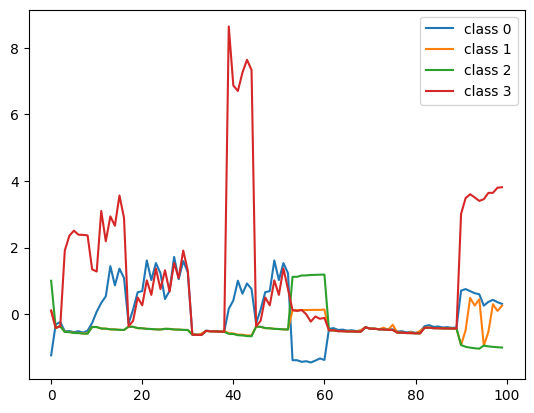

In [ ]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [ ]:
metricas_scoring = {
    "Accuracy": "accuracy",
    "Precision": "precision_weighted",
    "Recall": "recall_weighted",
    "F1-Score": "f1_weighted"
}

all_scores_cv = {nome_metrica: {} for nome_metrica in metricas_scoring.keys()}

In [ ]:
y_train_lstm = y_train.copy()
y_test_lstm = y_test.copy()
x_train_lstm = x_train.copy()
x_test_lstm = x_test.copy()

In [ ]:
x_train_lstm = x_train_lstm.reshape((x_train_lstm.shape[0], x_train_lstm.shape[1], 1))
x_test_lstm = x_test_lstm.reshape((x_test_lstm.shape[0], x_test_lstm.shape[1], 1))

In [ ]:
num_classes = len(np.unique(y_train))
print(num_classes)

4


In [ ]:
def make_model(input_shape, dropout_rate=0.5):
  input_layer = keras.layers.Input(input_shape)

  conv1 = keras.layers.Conv1D(filters=256, kernel_size=3, padding="same")(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)

  conv1 = keras.layers.Dropout(rate=dropout_rate)(conv1)

  conv2 = keras.layers.Conv1D(filters=256, kernel_size=3, padding="same")(conv1)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv2)

  conv2 = keras.layers.Dropout(rate=dropout_rate)(conv2)

  conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)

  gap = keras.layers.Dropout(rate=dropout_rate)(gap)

  output_layer = keras.layers.Dense(num_classes, activation="sigmoid")(gap)

  return keras.models.Model(inputs=input_layer, outputs=output_layer)


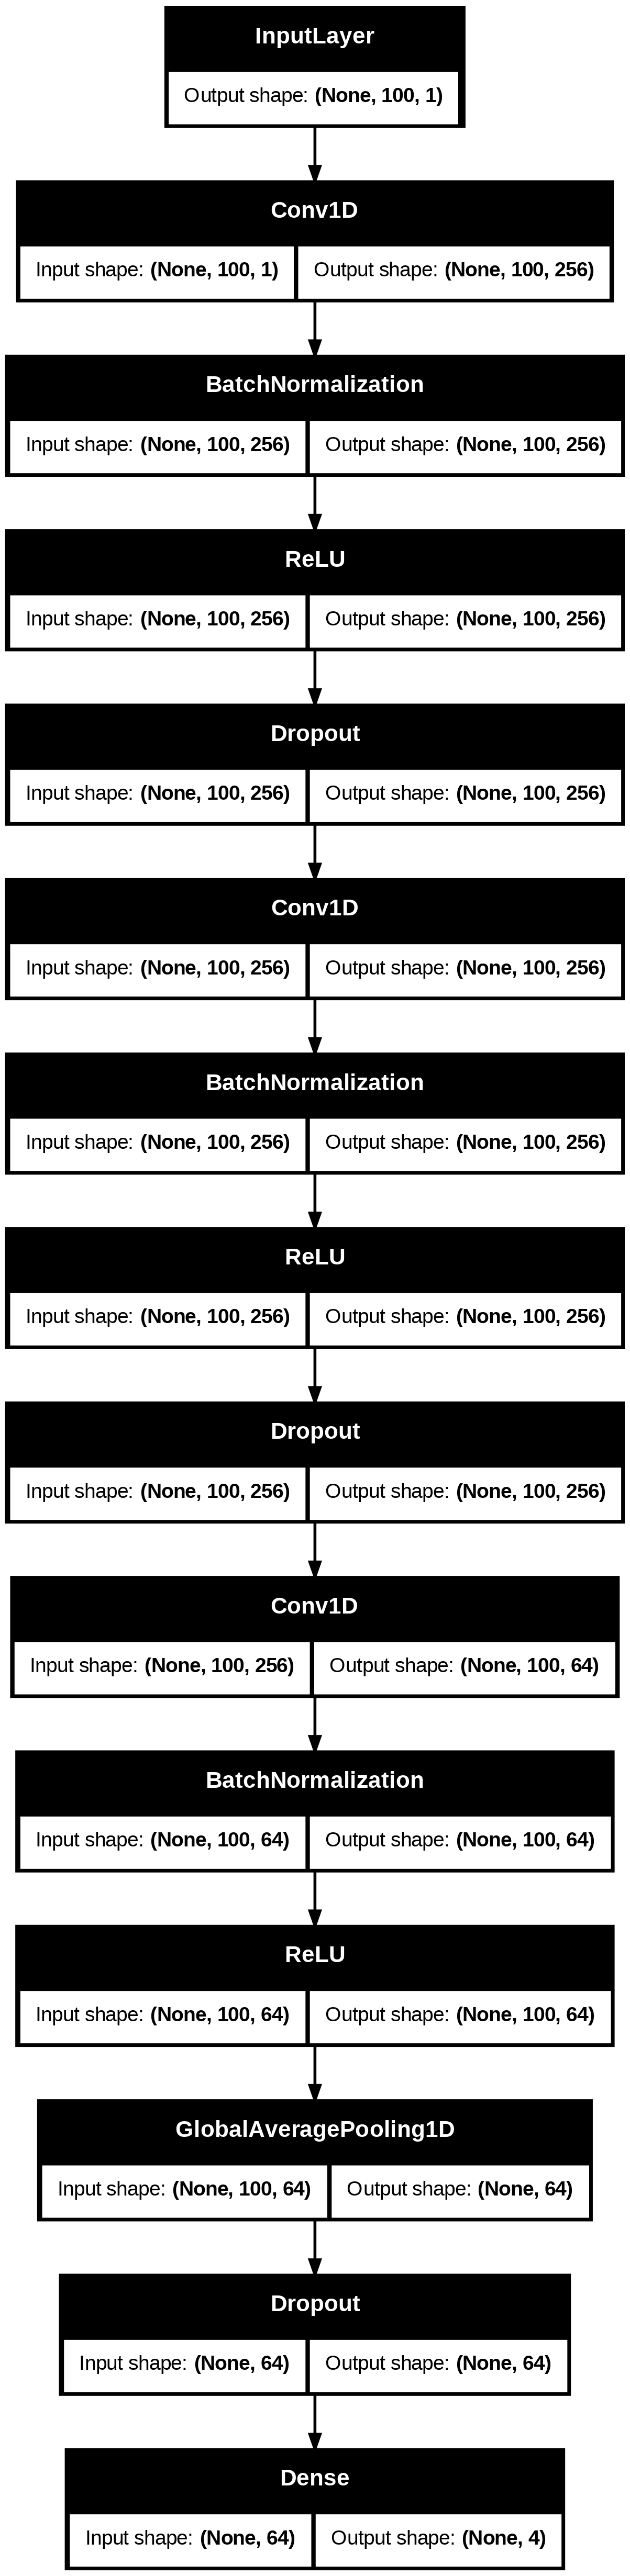

In [ ]:
model = make_model(input_shape=x_train_lstm.shape[1:])

keras.utils.plot_model(model, show_shapes=True)

In [ ]:
n_folds = 10
epochs = 50
batch_size = 32

In [ ]:
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

acc_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_per_fold = []
loss_per_fold = []

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=30, min_lr=0.0005
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", mode='min', patience=30, restore_best_weights=True, verbose=1),
]

In [ ]:
if len(y_train_lstm.shape) == 1:
    y_train_lstm = np.expand_dims(y_train_lstm, axis=-1)

if len(y_test_lstm.shape) == 1:
    y_test_lstm = np.expand_dims(y_test_lstm, axis=-1)

print(f"Novo shape de y_train: {y_train_lstm.shape}")


Novo shape de y_train: (52764, 1)


In [ ]:
from tqdm import tqdm

In [ ]:
fold_no = 1
for train_index, val_index in tqdm(kf.split(x_train_lstm, y_train_lstm)):
    print(f'----------------- Fold {fold_no}/{n_folds} -----------------')

    X_train_fold, X_val_fold = x_train_lstm[train_index], y_train_lstm[val_index]
    Y_train_fold, Y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

    model = make_model(input_shape=x_train_lstm.shape[1:])

    model.compile(
      optimizer='adam',
      loss="sparse_categorical_crossentropy",
      metrics=[
          SparseCategoricalAccuracy(name='accuracy'),
      ],
    )

    print('Treinando...')
    history = model.fit(
      x_train_lstm,
      y_train_lstm,
      batch_size=batch_size,
      epochs=epochs,
      callbacks=callbacks,
      validation_split=0.2,
      verbose=1,
    )

    print('Avaliando performance...')
    loss, accuracy_val = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    y_pred_probs = model.predict(X_val_fold)
    y_pred_labels = np.argmax(y_pred_probs, axis=1)
    y_true_labels = np.squeeze(Y_val_fold)

    print(f'Loss: {loss:.4f}, Accuracy: {accuracy_val:.4f}')

    # Incrementar o número do fold
    fold_no += 1


0it [00:00, ?it/s]

----------------- Fold 1/10 -----------------
Treinando...
Epoch 1/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7199 - loss: 0.7521 - val_accuracy: 0.8727 - val_loss: 0.4286 - learning_rate: 0.0010
Epoch 2/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8556 - loss: 0.4471 - val_accuracy: 0.9145 - val_loss: 0.2758 - learning_rate: 0.0010
Epoch 3/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8830 - loss: 0.3629 - val_accuracy: 0.9153 - val_loss: 0.2281 - learning_rate: 0.0010
Epoch 4/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9027 - loss: 0.3062 - val_accuracy: 0.9474 - val_loss: 0.1856 - learning_rate: 0.0010
Epoch 5/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9146 - loss: 0.2694 - val_accuracy: 0.9486 - val_loss: 0.1513 - learning_rate: 0.0010
Epoch 6/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9257 - loss: 0.2390 - val_accuracy: 0.9452 - val_loss: 0.1996 - learning_rate: 0.0010
Epoch 7/50
1320/

1it [03:26, 206.86s/it]

Loss: 236.6506, Accuracy: 0.2452
----------------- Fold 2/10 -----------------
Treinando...
Epoch 1/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7156 - loss: 0.7567 - val_accuracy: 0.8743 - val_loss: 0.3933 - learning_rate: 0.0010
Epoch 2/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8522 - loss: 0.4433 - val_accuracy: 0.9037 - val_loss: 0.2820 - learning_rate: 0.0010
Epoch 3/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8851 - loss: 0.3577 - val_accuracy: 0.9343 - val_loss: 0.2132 - learning_rate: 0.0010
Epoch 4/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9017 - loss: 0.3051 - val_accuracy: 0.9399 - val_loss: 0.1772 - learning_rate: 0.0010
Epoch 5/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9175 - loss: 0.2670 - val_accuracy: 0.9588 - val_loss: 0.1371 - learning_rate: 0.0010
Epoch 6/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9286 - loss: 0.2320 - val_accuracy: 0.9522 - val_loss: 0.1259 - learn

2it [06:54, 207.49s/it]

Loss: 237.9300, Accuracy: 0.2318
----------------- Fold 3/10 -----------------
Treinando...
Epoch 1/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7093 - loss: 0.7667 - val_accuracy: 0.8550 - val_loss: 0.4344 - learning_rate: 0.0010
Epoch 2/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8549 - loss: 0.4420 - val_accuracy: 0.9042 - val_loss: 0.2814 - learning_rate: 0.0010
Epoch 3/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8847 - loss: 0.3567 - val_accuracy: 0.9403 - val_loss: 0.1984 - learning_rate: 0.0010
Epoch 4/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9041 - loss: 0.3015 - val_accuracy: 0.9317 - val_loss: 0.1883 - learning_rate: 0.0010
Epoch 5/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9176 - loss: 0.2645 - val_accuracy: 0.9490 - val_loss: 0.1355 - learning_rate: 0.0010
Epoch 6/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9287 - loss: 0.2320 - val_accuracy: 0.9238 - val_loss: 0.2554 - learn

3it [10:35, 213.70s/it]

Loss: 228.3788, Accuracy: 0.5041
----------------- Fold 4/10 -----------------
Treinando...
Epoch 1/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7276 - loss: 0.7432 - val_accuracy: 0.8916 - val_loss: 0.3529 - learning_rate: 0.0010
Epoch 2/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8527 - loss: 0.4528 - val_accuracy: 0.9165 - val_loss: 0.2909 - learning_rate: 0.0010
Epoch 3/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8859 - loss: 0.3520 - val_accuracy: 0.9288 - val_loss: 0.1997 - learning_rate: 0.0010
Epoch 4/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9049 - loss: 0.2959 - val_accuracy: 0.9539 - val_loss: 0.1627 - learning_rate: 0.0010
Epoch 5/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9194 - loss: 0.2595 - val_accuracy: 0.9566 - val_loss: 0.1425 - learning_rate: 0.0010
Epoch 6/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9321 - loss: 0.2283 - val_accuracy: 0.9395 - val_loss: 0.2062 - learn

4it [14:21, 218.35s/it]

Loss: 268.9488, Accuracy: 0.2481
----------------- Fold 5/10 -----------------
Treinando...
Epoch 1/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7219 - loss: 0.7534 - val_accuracy: 0.8929 - val_loss: 0.3543 - learning_rate: 0.0010
Epoch 2/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8592 - loss: 0.4306 - val_accuracy: 0.9226 - val_loss: 0.2571 - learning_rate: 0.0010
Epoch 3/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8891 - loss: 0.3535 - val_accuracy: 0.9314 - val_loss: 0.2091 - learning_rate: 0.0010
Epoch 4/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8999 - loss: 0.3122 - val_accuracy: 0.9411 - val_loss: 0.2406 - learning_rate: 0.0010
Epoch 5/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9173 - loss: 0.2607 - val_accuracy: 0.9527 - val_loss: 0.1520 - learning_rate: 0.0010
Epoch 6/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9296 - loss: 0.2272 - val_accuracy: 0.9677 - val_loss: 0.1160 - learn

5it [18:08, 221.65s/it]

Loss: 249.7720, Accuracy: 0.2439
----------------- Fold 6/10 -----------------
Treinando...
Epoch 1/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7181 - loss: 0.7539 - val_accuracy: 0.8519 - val_loss: 0.4461 - learning_rate: 0.0010
Epoch 2/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8514 - loss: 0.4501 - val_accuracy: 0.8913 - val_loss: 0.3212 - learning_rate: 0.0010
Epoch 3/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8818 - loss: 0.3672 - val_accuracy: 0.9104 - val_loss: 0.2343 - learning_rate: 0.0010
Epoch 4/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9048 - loss: 0.3037 - val_accuracy: 0.9432 - val_loss: 0.1649 - learning_rate: 0.0010
Epoch 5/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9202 - loss: 0.2536 - val_accuracy: 0.9611 - val_loss: 0.1333 - learning_rate: 0.0010
Epoch 6/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9235 - loss: 0.2477 - val_accuracy: 0.9608 - val_loss: 0.1320 - learn

6it [21:54, 223.02s/it]

Loss: 243.7786, Accuracy: 0.2538
----------------- Fold 7/10 -----------------
Treinando...
Epoch 1/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7065 - loss: 0.7775 - val_accuracy: 0.8905 - val_loss: 0.3684 - learning_rate: 0.0010
Epoch 2/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8556 - loss: 0.4438 - val_accuracy: 0.9137 - val_loss: 0.2922 - learning_rate: 0.0010
Epoch 3/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8847 - loss: 0.3578 - val_accuracy: 0.9372 - val_loss: 0.1940 - learning_rate: 0.0010
Epoch 4/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9046 - loss: 0.2924 - val_accuracy: 0.9393 - val_loss: 0.1762 - learning_rate: 0.0010
Epoch 5/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9193 - loss: 0.2580 - val_accuracy: 0.9418 - val_loss: 0.1554 - learning_rate: 0.0010
Epoch 6/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9235 - loss: 0.2508 - val_accuracy: 0.9673 - val_loss: 0.1319 - learn

7it [25:40, 223.88s/it]

Loss: 273.4606, Accuracy: 0.2504
----------------- Fold 8/10 -----------------
Treinando...
Epoch 1/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7161 - loss: 0.7574 - val_accuracy: 0.8654 - val_loss: 0.3849 - learning_rate: 0.0010
Epoch 2/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8538 - loss: 0.4468 - val_accuracy: 0.9176 - val_loss: 0.2511 - learning_rate: 0.0010
Epoch 3/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8849 - loss: 0.3539 - val_accuracy: 0.9308 - val_loss: 0.2152 - learning_rate: 0.0010
Epoch 4/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9046 - loss: 0.2976 - val_accuracy: 0.9351 - val_loss: 0.1971 - learning_rate: 0.0010
Epoch 5/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9173 - loss: 0.2599 - val_accuracy: 0.9460 - val_loss: 0.1609 - learning_rate: 0.0010
Epoch 6/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9276 - loss: 0.2309 - val_accuracy: 0.9643 - val_loss: 0.1237 - learn

8it [29:29, 225.73s/it]

Loss: 205.2864, Accuracy: 0.2619
----------------- Fold 9/10 -----------------
Treinando...
Epoch 1/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7137 - loss: 0.7632 - val_accuracy: 0.8850 - val_loss: 0.3732 - learning_rate: 0.0010
Epoch 2/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8562 - loss: 0.4474 - val_accuracy: 0.9250 - val_loss: 0.2374 - learning_rate: 0.0010
Epoch 3/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8831 - loss: 0.3529 - val_accuracy: 0.9131 - val_loss: 0.2911 - learning_rate: 0.0010
Epoch 4/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9044 - loss: 0.3018 - val_accuracy: 0.9476 - val_loss: 0.1678 - learning_rate: 0.0010
Epoch 5/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9196 - loss: 0.2560 - val_accuracy: 0.9628 - val_loss: 0.1323 - learning_rate: 0.0010
Epoch 6/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9297 - loss: 0.2266 - val_accuracy: 0.9575 - val_loss: 0.1478 - learn

9it [33:14, 225.35s/it]

Loss: 279.1860, Accuracy: 0.2453
----------------- Fold 10/10 -----------------
Treinando...
Epoch 1/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7191 - loss: 0.7551 - val_accuracy: 0.8785 - val_loss: 0.3838 - learning_rate: 0.0010
Epoch 2/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8524 - loss: 0.4465 - val_accuracy: 0.9023 - val_loss: 0.2933 - learning_rate: 0.0010
Epoch 3/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8821 - loss: 0.3587 - val_accuracy: 0.9353 - val_loss: 0.2286 - learning_rate: 0.0010
Epoch 4/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9051 - loss: 0.2970 - val_accuracy: 0.9432 - val_loss: 0.1682 - learning_rate: 0.0010
Epoch 5/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9180 - loss: 0.2604 - val_accuracy: 0.9344 - val_loss: 0.2176 - learning_rate: 0.0010
Epoch 6/50
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9255 - loss: 0.2356 - val_accuracy: 0.9589 - val_loss: 0.1189 - lear

10it [37:00, 222.04s/it]

Loss: 221.2995, Accuracy: 0.2549


In [ ]:
modelLSTM = keras.models.load_model("best_model.keras")

test_loss, test_acc = model.evaluate(x_test_lstm, y_test_lstm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9845 - loss: 0.0425
Test accuracy 0.9849908947944641
Test loss 0.04334444925189018


In [ ]:
from sklearn.metrics import classification_report

y_pred_probs = modelLSTM.predict(x_test_lstm)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.squeeze(y_test_lstm)

report = classification_report(
    y_true_labels,
    y_pred_labels,
    target_names=['Benign (0)', 'DoS-Slowloris (1)', 'DoS-SlowHTTPTest (2)', 'DDoS attacks-Slowloris (3)'],
    digits=4,
    zero_division=0 
)

print("\n--- Relatório de Classificação Completo ---")
print(report)

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

--- Relatório de Classificação Completo ---
                            precision    recall  f1-score   support

                Benign (0)     0.9969    0.9932    0.9951      3241
         DoS-Slowloris (1)     0.9846    0.9822    0.9834      3321
      DoS-SlowHTTPTest (2)     0.9924    0.9669    0.9795      3261
DDoS attacks-Slowloris (3)     0.9675    0.9973    0.9822      3369

                  accuracy                         0.9850     13192
                 macro avg     0.9854    0.9849    0.9850     13192
              weighted avg     0.9852    0.9850    0.9850     13192



Scores de CV do LSTM coletados e salvos em 'all_scores_cv_teste'.


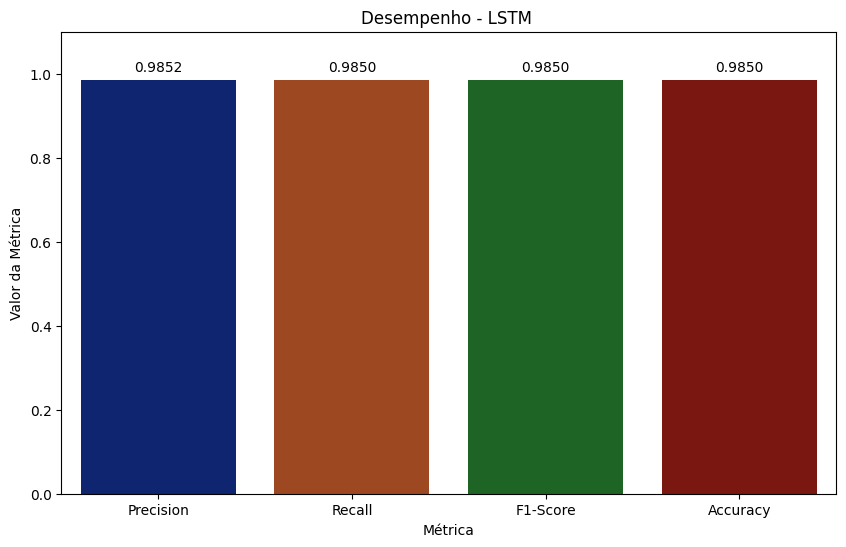

In [ ]:
precision = precision_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
recall = recall_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_labels, y_pred_labels)

lstm_scores_temp = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
for nome_metrica in metricas_scoring.keys():
    scores_lstm = np.array(lstm_scores_temp[nome_metrica])

    all_scores_cv[nome_metrica]['LSTM'] = scores_lstm

print(f"Scores de CV do {'LSTM'} coletados e salvos em 'all_scores_cv_teste'.")

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}
df_metricas = pd.DataFrame(metricas)
df_metrics_lstm = df_metricas.copy()
df_metrics_lstm = df_metrics_lstm.insert(loc=0, column='Modelo', value='LSTM')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

plt.title('Desempenho - LSTM ')
plt.ylim(0, 1.1)
plt.ylabel('Valor da Métrica')
plt.show()

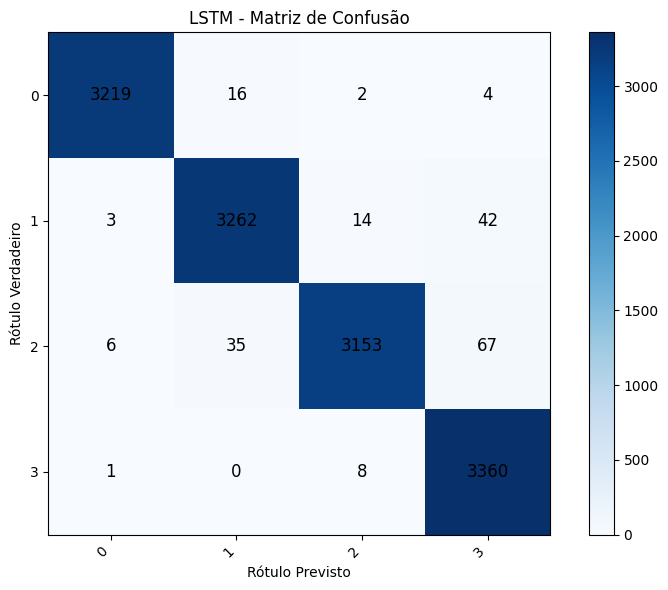

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.squeeze(y_test_lstm)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]),
                 ha='center', va='center',
                 color='black', fontsize=12) 

plt.title('LSTM - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')
plt.xticks(ticks=np.arange(len(classes)), labels=classes, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.tight_layout() 
plt.show()

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


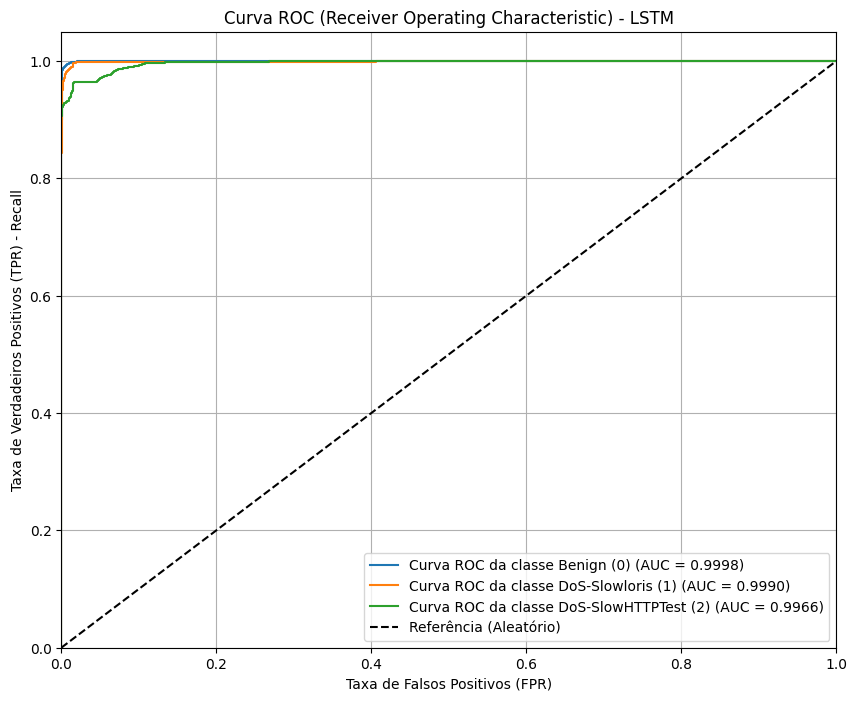

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

class_names = [0, 1, 2]
n_classes = len(class_names)

legend_names = ['Benign (0)', 'DoS-Slowloris (1)', 'DoS-SlowHTTPTest (2)']

y_pred_prob = model.predict(x_test_lstm) 
y_true_labels = np.squeeze(y_test_lstm)
y_test_bin = label_binarize(y_true_labels, classes=class_names)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {legend_names[i]} (AUC = {roc_auc[i]:.4f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR) - Recall')
plt.title('Curva ROC (Receiver Operating Characteristic) - LSTM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
modelMLP = MLPClassifier(hidden_layer_sizes=(256,),
                         max_iter = 1000,activation = 'tanh',
                         solver = 'adam',
                         learning_rate_init = 0.05, early_stopping = True,
                         verbose=True)

modelMLP.fit(x_train, y_train)

X_dados_cv = x_train
Y_dados_cv = y_train

nome_modelo = "MLP"

for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(modelMLP, X_dados_cv, Y_dados_cv, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores

print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv'.")

Iteration 1, loss = 0.17738370
Validation score: 0.984650
Iteration 2, loss = 0.12315502
Validation score: 0.982566
Iteration 3, loss = 0.26905355
Validation score: 0.981997
Iteration 4, loss = 0.10214725
Validation score: 0.979534
Iteration 5, loss = 0.20885785
Validation score: 0.975365
Iteration 6, loss = 0.12362661
Validation score: 0.976881
Iteration 7, loss = 0.10760124
Validation score: 0.982755
Iteration 8, loss = 0.14738658
Validation score: 0.972712
Iteration 9, loss = 0.11375881
Validation score: 0.983324
Iteration 10, loss = 0.10993926
Validation score: 0.971954
Iteration 11, loss = 0.15395055
Validation score: 0.974038
Iteration 12, loss = 0.23164561
Validation score: 0.984271
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Scores de CV do MLP coletados e salvos em 'all_scores_cv'.


In [ ]:
previsoes_algoritmos = {}

In [ ]:
previsoes_algoritmos['LSTM'] = y_pred_labels

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [ ]:
predictsMLP = modelMLP.predict(x_test)

accuracyMLP = accuracy_score(y_test, predictsMLP)
print(f'Precisão do modelo de MLP: {accuracyMLP}')

reportMLP = classification_report(y_test, predictsMLP, digits=4)
print(f'\nRelatório de Classificação:\n{reportMLP}')

Precisão do modelo de MLP: 0.9833990297149787

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9926    0.9944    0.9935      3241
           1     0.9954    0.9702    0.9826      3321
           2     0.9925    0.9758    0.9841      3261
           3     0.9555    0.9932    0.9739      3369

    accuracy                         0.9834     13192
   macro avg     0.9840    0.9834    0.9835     13192
weighted avg     0.9838    0.9834    0.9834     13192



In [ ]:
print(f'Scores validação cruzada MLP: {scores}')
print(f'Média dos scores: {scores.mean()}')
print(f'Desvio padrão dos scores: {scores.std()}')

Scores validação cruzada MLP: [0.97899155 0.9807461  0.98409647 0.98182036 0.98242415 0.98161825
 0.98184799 0.98353403 0.97667152 0.98598919]
Média dos scores: 0.9817739602097746
Desvio padrão dos scores: 0.0024808841394554156


In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt # Importe para customizar o gráfico
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


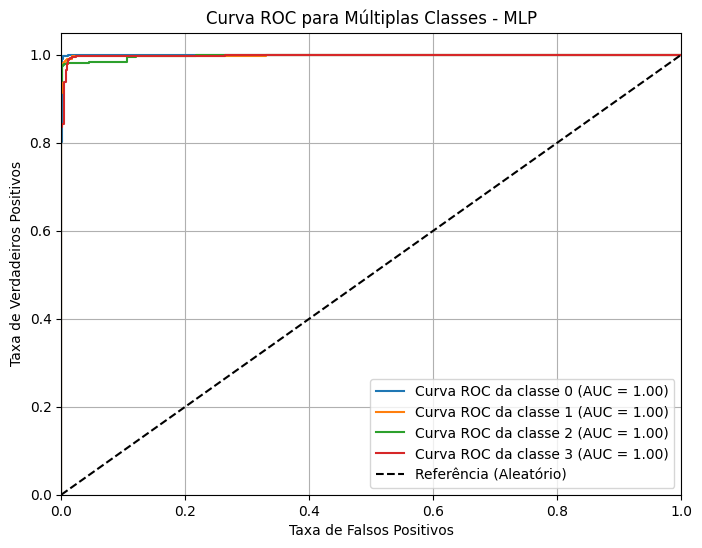

In [ ]:
class_names = modelMLP.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - MLP')
plt.legend(loc="lower right")
plt.grid()
plt.show()

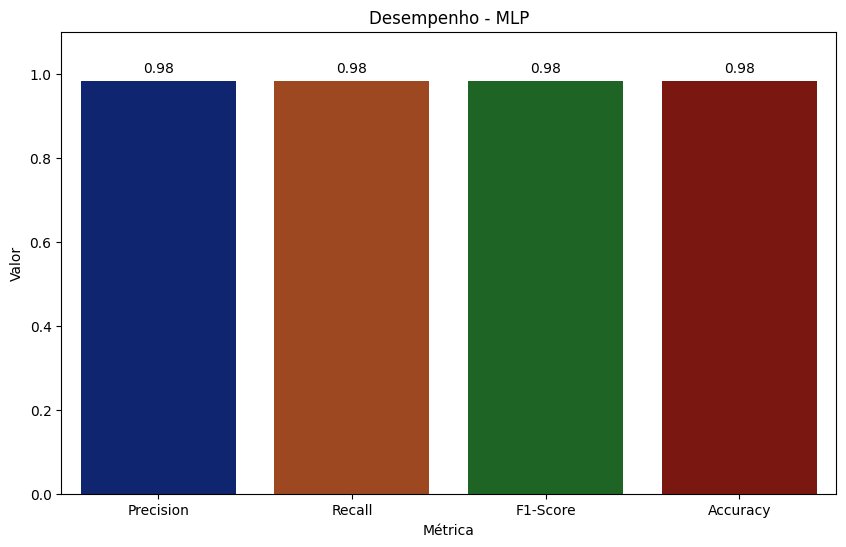

In [ ]:
y_pred = predictsMLP
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - MLP')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

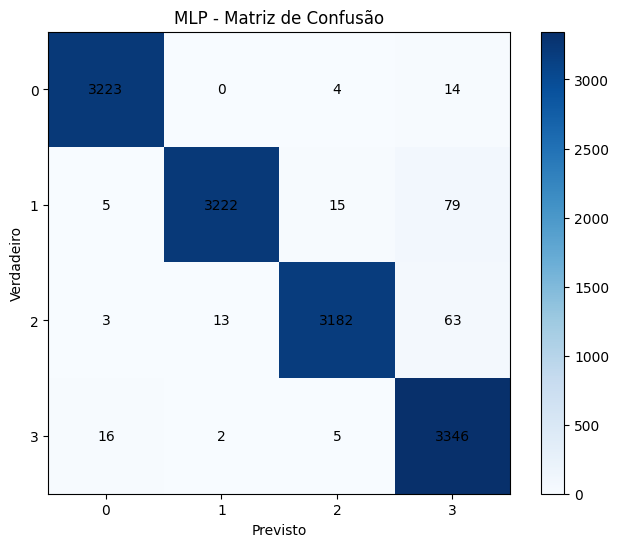

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('MLP - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
previsoes_algoritmos['MLP'] = y_pred

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier(
  criterion='entropy',
  max_depth=10,
  min_samples_split=2,
  min_samples_leaf=1,
  max_features=None
)

modelDT.fit(x_train, y_train)

nome_modelo = "Decision Tree"
X_dados = x_train 
Y_dados = y_train 


for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(modelDT, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)
    all_scores_cv[nome_metrica][nome_modelo] = scores

scores_DT = scores
print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv_teste'.")

print(f'Scores validação cruzada MLP: {scores_DT}')
print(f'Média dos scores: {scores_DT.mean()}')
print(f'Desvio padrão dos scores: {scores_DT.std()}')


Scores de CV do Decision Tree coletados e salvos em 'all_scores_cv_teste'.
Scores validação cruzada MLP: [0.99962093 0.99905256 0.99867363 0.99905234 0.99924199 0.99943139
 0.99905224 0.99962093 0.99924185 0.99981046]
Média dos scores: 0.9992798328451766
Desvio padrão dos scores: 0.0003260027031237654


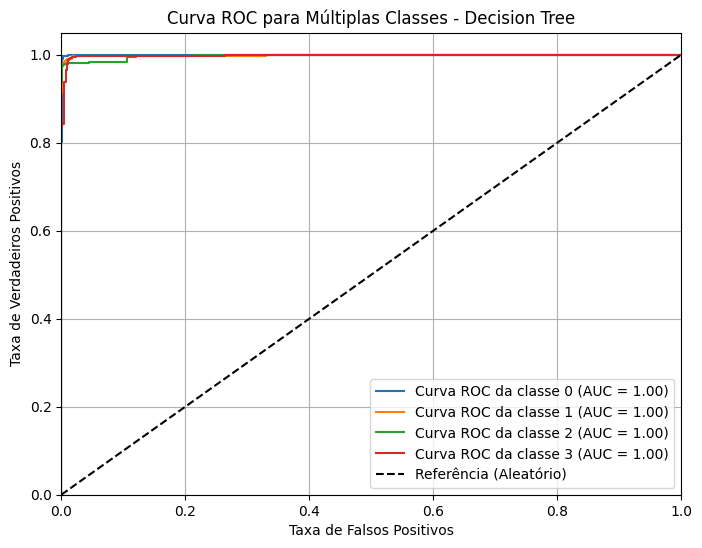

In [ ]:
class_names = modelDT.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
predictsDT = modelDT.predict(x_test)

accuracyDT = accuracy_score(y_test, predictsDT)
print(f'Precisão do modelo de Árvore de Decisão: {accuracyDT}')

reportDT = classification_report(y_test, predictsDT, digits=4)
print(f'\nRelatório de Classificação:\n{reportDT}')

Precisão do modelo de Árvore de Decisão: 0.9995451788963008

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9997    1.0000    0.9998      3241
           1     0.9988    0.9997    0.9992      3321
           2     0.9997    0.9988    0.9992      3261
           3     1.0000    0.9997    0.9999      3369

    accuracy                         0.9995     13192
   macro avg     0.9995    0.9995    0.9995     13192
weighted avg     0.9995    0.9995    0.9995     13192



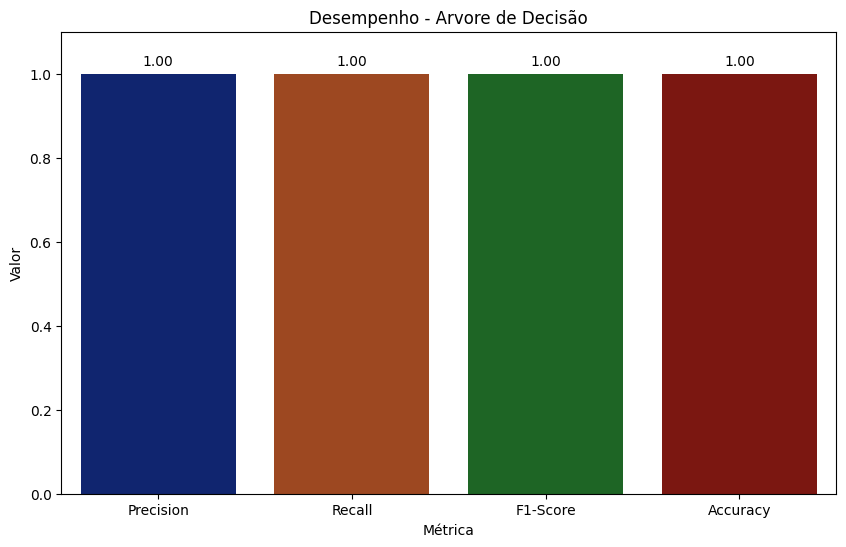

In [ ]:
y_pred = predictsDT
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_dt = df_metricas.copy()
df_metrics_dt.insert(loc=0, column='Modelo', value='Arvore de Decisão')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Desempenho - Arvore de Decisão')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

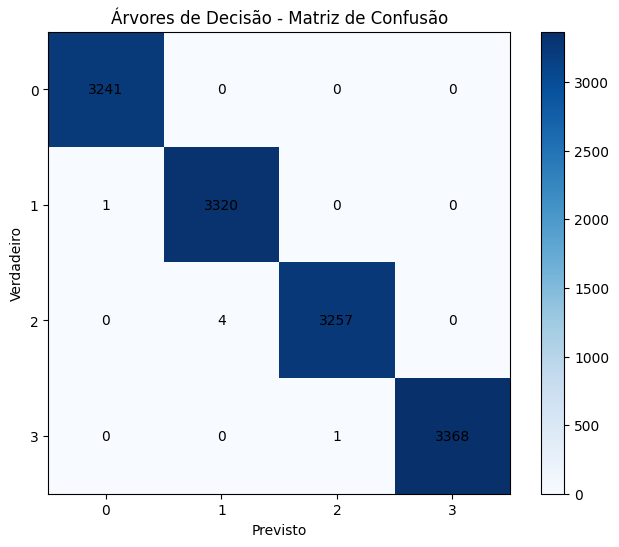

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Árvores de Decisão - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(
  n_estimators=100,
  criterion='entropy',
  min_samples_split=2,
  min_samples_leaf=1,
  random_state=42
)

modelRF.fit(x_train, y_train)

nome_modelo = "Random Forest"
X_dados_cv = x_train
Y_dados_cv = y_train

for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(modelRF, X_dados_cv, Y_dados_cv, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores

scores_RF = scores 
print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv'.")
print(f'Scores validação cruzada Random Forest: {scores_RF}')
print(f'Média dos scores: {scores_RF.mean()}')
print(f'Desvio padrão dos scores: {scores_RF.std()}')

Scores de CV do Random Forest coletados e salvos em 'all_scores_cv'.
Scores validação cruzada Random Forest: [1.         0.9998105  0.999621   0.99943135 1.         0.99943139
 0.99943139 1.         1.         0.99962092]
Média dos scores: 0.9997346542824402
Desvio padrão dos scores: 0.0002427290442263803


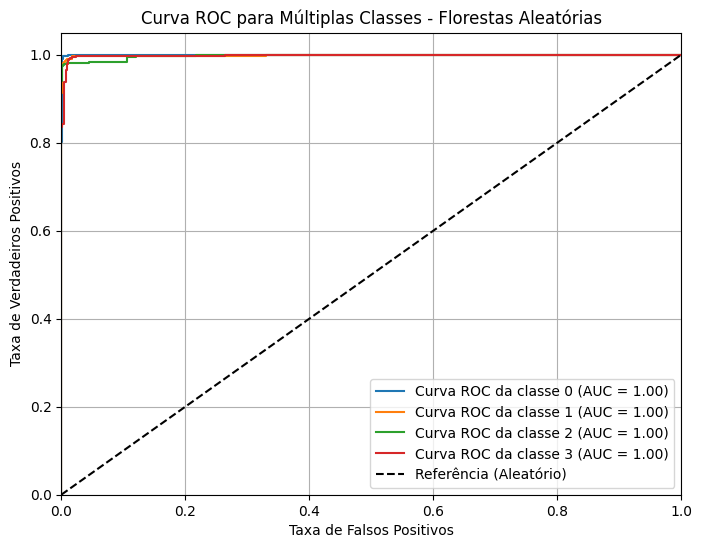

In [ ]:
class_names = modelRF.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Florestas Aleatórias')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
predictsRF = modelRF.predict(x_test)

accuracyRF = accuracy_score(y_test, predictsRF)
print(f'Precisão do modelo de Floresta Aleatória: {accuracyRF}')

reportRF = classification_report(y_test, predictsRF, digits=4)
print(f'\nRelatório de Classificação:\n{reportRF}')

Precisão do modelo de Floresta Aleatória: 0.9999241964827168

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9997    1.0000    0.9998      3241
           1     1.0000    0.9997    0.9998      3321
           2     1.0000    1.0000    1.0000      3261
           3     1.0000    1.0000    1.0000      3369

    accuracy                         0.9999     13192
   macro avg     0.9999    0.9999    0.9999     13192
weighted avg     0.9999    0.9999    0.9999     13192



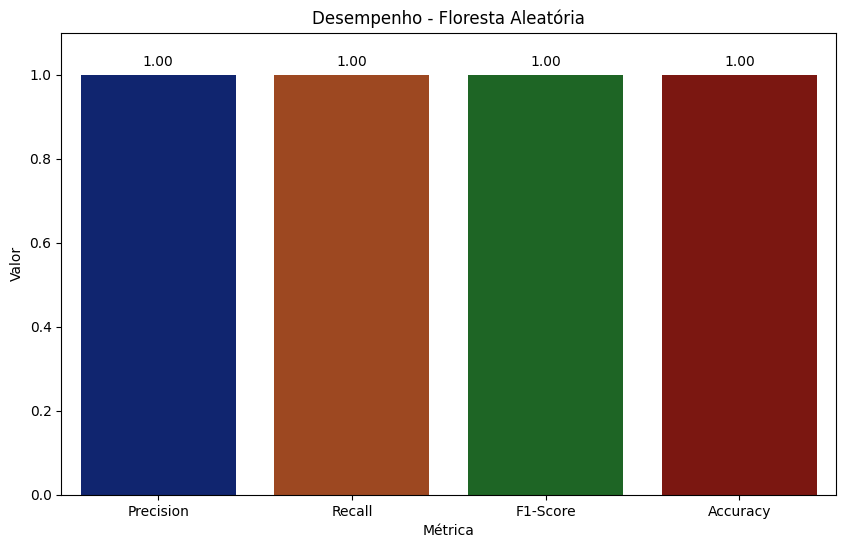

In [ ]:
y_pred = predictsRF
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_rf = df_metricas.copy()
df_metrics_rf.insert(loc=0, column='Modelo', value='Floresta Aleatória')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - Floresta Aleatória')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [ ]:
previsoes_algoritmos['Floresta Aleatória'] = y_pred

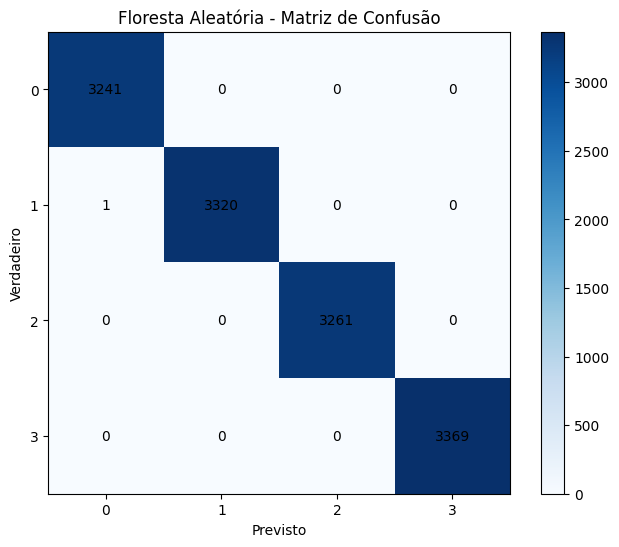

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Floresta Aleatória - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
adb.fit(x_train, y_train)

nome_modelo = "AdaBoost"

X_dados_cv = x_train
Y_dados_cv = y_train

for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(adb, X_dados_cv, Y_dados_cv, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores

scores_adb = scores 

print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv'.")
print(f'Scores validação cruzada AdaBoost: {scores_adb}')
print(f'Média dos scores: {scores_adb.mean()}')
print(f'Desvio padrão dos scores: {scores_adb.std()}')

Scores de CV do AdaBoost coletados e salvos em 'all_scores_cv'.
Scores validação cruzada AdaBoost: [0.95993343 0.94579628 0.95672344 0.93487586 0.95931682 0.96613807
 0.96826041 0.9581191  0.96926799 0.96943995]
Média dos scores: 0.9587871343393937
Desvio padrão dos scores: 0.010554245227309692


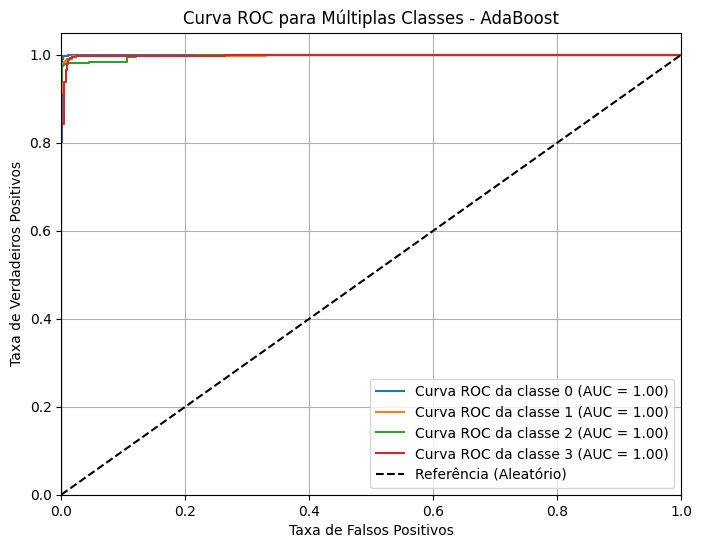

In [ ]:
class_names = adb.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - AdaBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
predictions_adb = adb.predict(x_test)
print(classification_report(y_test, predictions_adb))

accuracyadb = accuracy_score(y_test, predictions_adb)
print(f'Precisão do modelo de AdaBoost: {accuracyadb}')

reportadb = classification_report(y_test, predictions_adb, digits=4)
print(f'\nRelatório de Classificação:\n{reportadb}')

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3241
           1       0.92      0.99      0.95      3321
           2       0.93      0.91      0.92      3261
           3       1.00      0.86      0.93      3369

    accuracy                           0.94     13192
   macro avg       0.94      0.94      0.94     13192
weighted avg       0.94      0.94      0.94     13192

Precisão do modelo de AdaBoost: 0.9389023650697392

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9173    0.9994    0.9566      3241
           1     0.9172    0.9868    0.9507      3321
           2     0.9316    0.9098    0.9206      3261
           3     1.0000    0.8617    0.9257      3369

    accuracy                         0.9389     13192
   macro avg     0.9415    0.9394    0.9384     13192
weighted avg     0.9419    0.9389    0.9383     13192



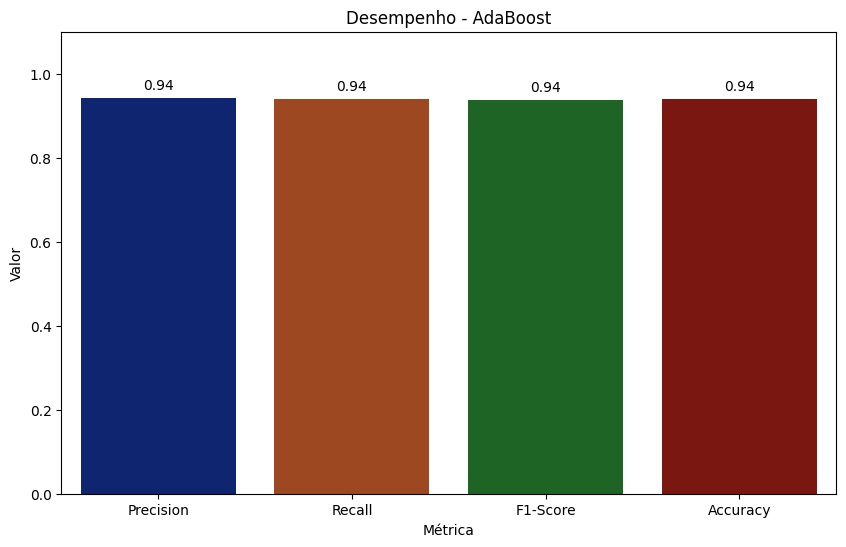

In [ ]:
y_pred = predictions_adb
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_adb = df_metricas.copy()
df_metrics_adb.insert(loc=0, column='Modelo', value='AdaBoost')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - AdaBoost')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [ ]:
previsoes_algoritmos['AdaBoost'] = y_pred

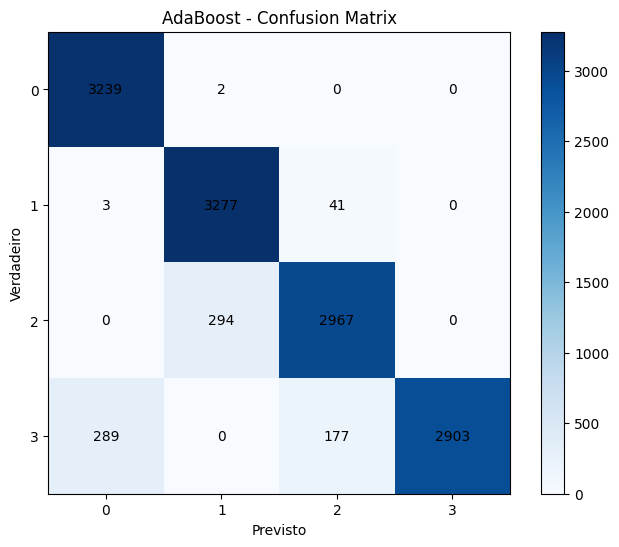

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('AdaBoost - Confusion Matrix')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [ ]:
def create_dataset(data, look_back=1):
   X, y = [], []
   for i in range(len(data)-look_back-1):
       a = data[i:(i+look_back), 0]
       X.append(a)
       y.append(data[i + look_back, 0])
   return np.array(X), np.array(y)


look_back = 10
X, y = create_dataset(x, look_back)

In [ ]:
X_gru = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
scaler_ts = StandardScaler()
# Treina o novo scaler APENAS na coluna que você está prevendo (coluna 0 de x)
scaler_ts.fit(x[:, 0].reshape(-1, 1))

,copy,True
,with_mean,True
,with_std,True


In [ ]:
model_gru_ts = Sequential()
model_gru_ts.add(GRU( 50 , return_sequences= True , input_shape=(look_back, 1 )))
model_gru_ts.add(GRU( 50 ))
model_gru_ts.add(Dense( 1 ))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_gru_ts.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model_gru_ts.fit(X_gru, y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.3474
Epoch 2/100
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.3275
Epoch 3/100
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.3276
Epoch 4/100
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.3223
Epoch 5/100
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.3275
Epoch 6/100
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.3287
Epoch 7/100
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.3225
Epoch 8/100
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.3216
Epoch 9/100
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.3227
Epoch 10/100
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.3252
Epoch 11/100
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.3180
Epoch 12/100
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.3220
Epoch 13/100
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.3174
Epoch 14/100
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.3257
E

In [ ]:
predictions = model_gru_ts.predict(X)
predictions = scaler_ts.inverse_transform(predictions)
y_actual = scaler_ts.inverse_transform([y])

2061/2061 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

def make_gru_model(input_shape, num_classes, dropout_rate=0.5):

    model = Sequential()
    model.add(GRU(units=128,
                  input_shape=input_shape,
                  return_sequences=False,
                  implementation=2)) 

    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    return model

print("\n\n---------------------------------------------")
print("INICIANDO VALIDAÇÃO CRUZADA PARA GRU")
print("---------------------------------------------")

model_gru_name = "GRU"
n_folds = 10

gru_scores_temp = {nome_metrica: [] for nome_metrica in metricas_scoring.keys()}
input_shape = x_train_lstm.shape[1:]

for fold_no, (train_index, val_index) in enumerate(tqdm(kf.split(x_train_lstm, y_train_lstm), total=n_folds, desc=f"Folds do {model_gru_name}")):
    X_train_fold, X_val_fold = x_train_lstm[train_index], x_train_lstm[val_index]
    Y_train_fold, Y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

    model_gru = make_gru_model(input_shape, num_classes)

    model_gru.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=['accuracy'],
    )

    model_gru.fit(X_train_fold, Y_train_fold, epochs=50, batch_size=32, verbose=1)

    y_pred_probs = model_gru.predict(X_val_fold, verbose=0)
    y_pred_labels = np.argmax(y_pred_probs, axis=1) 
    y_true_labels = np.squeeze(Y_val_fold) 
    gru_scores_temp['Accuracy'].append(accuracy_score(y_true_labels, y_pred_labels))
    gru_scores_temp['Precision'].append(precision_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0))
    gru_scores_temp['Recall'].append(recall_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0))
    gru_scores_temp['F1-Score'].append(f1_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0))


for nome_metrica in metricas_scoring.keys():
    all_scores_cv[nome_metrica][model_gru_name] = np.array(gru_scores_temp[nome_metrica])

print("\nValidação Cruzada GRU concluída e scores salvos em 'all_scores_cv'.")

modelGRU_final = make_gru_model(input_shape, num_classes)
modelGRU_final.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

print("\nTreinando modelo GRU final...")
modelGRU_final.fit(x_train_lstm, y_train_lstm, epochs=50, batch_size=32, callbacks=callbacks, validation_split=0.2, verbose=0)

test_loss_gru, test_acc_gru = modelGRU_final.evaluate(x_test_lstm, y_test_lstm, verbose=0)
print(f"Acurácia final do GRU no teste: {test_acc_gru:.4f}")

modelGRU_final.save('best_model_gru.keras')
modelGRU = modelGRU_final 

y_pred_probs_gru = modelGRU.predict(x_test_lstm)
y_pred_gru = np.argmax(y_pred_probs_gru, axis=1)
previsoes_algoritmos['GRU'] = y_pred_gru

print("Modelo GRU final treinado e salvo como 'modelGRU'.")



---------------------------------------------
INICIANDO VALIDAÇÃO CRUZADA MANUAL PARA GRU
---------------------------------------------


Folds do GRU:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1484/1484 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7623 - loss: 0.5988
Epoch 2/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9432 - loss: 0.1878
Epoch 3/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9564 - loss: 0.1548
Epoch 4/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9640 - loss: 0.1268
Epoch 5/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9691 - loss: 0.1105
Epoch 6/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9679 - loss: 0.1129
Epoch 7/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9791 - loss: 0.0778
Epoch 8/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9815 - loss: 0.0694
Epoch 9/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9801 - loss: 0.0725
Epoch 10/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9831 - loss: 0.0630
Epoch 11/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9833 - loss: 0.0550
Epoch 12/50
1484/1484 ━━━━━━━━

Folds do GRU:  10%|█         | 1/10 [08:13<1:14:02, 493.56s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1484/1484 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7696 - loss: 0.5833
Epoch 2/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9444 - loss: 0.1873
Epoch 3/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9508 - loss: 0.1593
Epoch 4/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9685 - loss: 0.1153
Epoch 5/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9681 - loss: 0.1139
Epoch 6/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9712 - loss: 0.1074
Epoch 7/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9790 - loss: 0.0807
Epoch 8/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9791 - loss: 0.0807
Epoch 9/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9817 - loss: 0.0690
Epoch 10/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9850 - loss: 0.0563
Epoch 11/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9844 - loss: 0.0588
Epoch 12/50
1484/1484 ━━━━━━━━

Folds do GRU:  20%|██        | 2/10 [16:22<1:05:28, 491.01s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1484/1484 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7564 - loss: 0.6230
Epoch 2/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9385 - loss: 0.2193
Epoch 3/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9610 - loss: 0.1408
Epoch 4/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9573 - loss: 0.1433
Epoch 5/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9614 - loss: 0.1294
Epoch 6/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9666 - loss: 0.1150
Epoch 7/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9762 - loss: 0.0830
Epoch 8/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9820 - loss: 0.0644
Epoch 9/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9809 - loss: 0.0672
Epoch 10/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9823 - loss: 0.0681
Epoch 11/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9865 - loss: 0.0482
Epoch 12/50
1484/1484 ━━━━━━━━

Folds do GRU:  30%|███       | 3/10 [24:31<57:10, 490.07s/it]  

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1484/1484 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7701 - loss: 0.6096
Epoch 2/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9305 - loss: 0.2296
Epoch 3/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9531 - loss: 0.1547
Epoch 4/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9680 - loss: 0.1156
Epoch 5/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9703 - loss: 0.1115
Epoch 6/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9728 - loss: 0.0965
Epoch 7/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9762 - loss: 0.0881
Epoch 8/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9809 - loss: 0.0730
Epoch 9/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9815 - loss: 0.0675
Epoch 10/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9837 - loss: 0.0581
Epoch 11/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9827 - loss: 0.0638
Epoch 12/50
1484/1484 ━━━━━━━━

Folds do GRU:  40%|████      | 4/10 [32:50<49:21, 493.51s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1484/1484 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7706 - loss: 0.5811
Epoch 2/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9554 - loss: 0.1642
Epoch 3/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9540 - loss: 0.1554
Epoch 4/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9649 - loss: 0.1249
Epoch 5/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9718 - loss: 0.1052
Epoch 6/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9591 - loss: 0.1421
Epoch 7/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9794 - loss: 0.0818
Epoch 8/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9828 - loss: 0.0660
Epoch 9/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9849 - loss: 0.0577
Epoch 10/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9850 - loss: 0.0537
Epoch 11/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9882 - loss: 0.0424
Epoch 12/50
1484/1484 ━━━━━━━━━━━━━━

Folds do GRU:  50%|█████     | 5/10 [40:49<40:41, 488.39s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1484/1484 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7503 - loss: 0.6412
Epoch 2/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9449 - loss: 0.1932
Epoch 3/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9608 - loss: 0.1462
Epoch 4/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9567 - loss: 0.1546
Epoch 5/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9706 - loss: 0.1067
Epoch 6/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9752 - loss: 0.0868
Epoch 7/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9739 - loss: 0.0961
Epoch 8/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9779 - loss: 0.0850
Epoch 9/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9814 - loss: 0.0713
Epoch 10/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9812 - loss: 0.0661
Epoch 11/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9822 - loss: 0.0622
Epoch 12/50
1484/1484 ━━━━━━━━━━━━━━━━━

Folds do GRU:  60%|██████    | 6/10 [49:26<33:11, 497.91s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1484/1484 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7715 - loss: 0.5990
Epoch 2/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9273 - loss: 0.2404
Epoch 3/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9588 - loss: 0.1473
Epoch 4/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9633 - loss: 0.1297
Epoch 5/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9657 - loss: 0.1222
Epoch 6/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9757 - loss: 0.0881
Epoch 7/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9780 - loss: 0.0822
Epoch 8/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9799 - loss: 0.0713
Epoch 9/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9851 - loss: 0.0509
Epoch 10/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9577 - loss: 0.1577
Epoch 11/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9803 - loss: 0.0715
Epoch 12/50
1484/1484 ━━━━━━━━

Folds do GRU:  70%|███████   | 7/10 [58:16<25:25, 508.61s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1484/1484 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7788 - loss: 0.5933
Epoch 2/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9373 - loss: 0.2019
Epoch 3/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9523 - loss: 0.1528
Epoch 4/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9641 - loss: 0.1236
Epoch 5/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9706 - loss: 0.1054
Epoch 6/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9694 - loss: 0.1087
Epoch 7/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9772 - loss: 0.0833
Epoch 8/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9829 - loss: 0.0644
Epoch 9/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9811 - loss: 0.0679
Epoch 10/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9822 - loss: 0.0672
Epoch 11/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9867 - loss: 0.0472
Epoch 12/50
1484/1484 ━━━━━━━━

Folds do GRU:  80%|████████  | 8/10 [1:06:51<17:01, 510.61s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1484/1484 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7832 - loss: 0.5709
Epoch 2/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9454 - loss: 0.1824
Epoch 3/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9466 - loss: 0.1716
Epoch 4/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9609 - loss: 0.1359
Epoch 5/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9516 - loss: 0.1533
Epoch 6/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9665 - loss: 0.1142
Epoch 7/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9694 - loss: 0.1028
Epoch 8/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9763 - loss: 0.0836
Epoch 9/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9797 - loss: 0.0757
Epoch 10/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9830 - loss: 0.0613
Epoch 11/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9829 - loss: 0.0577
Epoch 12/50
1484/1484 ━━━━━━━━

Folds do GRU:  90%|█████████ | 9/10 [1:15:31<08:33, 513.43s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1484/1484 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7760 - loss: 0.5766
Epoch 2/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9419 - loss: 0.1933
Epoch 3/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9520 - loss: 0.1558
Epoch 4/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9609 - loss: 0.1274
Epoch 5/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9709 - loss: 0.1062
Epoch 6/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9725 - loss: 0.1004
Epoch 7/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9741 - loss: 0.0973
Epoch 8/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9798 - loss: 0.0775
Epoch 9/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9820 - loss: 0.0684
Epoch 10/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9841 - loss: 0.0604
Epoch 11/50
1484/1484 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9845 - loss: 0.0553
Epoch 12/50
1484/1484 ━━━━━━━━

Folds do GRU: 100%|██████████| 10/10 [1:24:12<00:00, 505.21s/it]
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Validação Cruzada GRU concluída e scores salvos em 'all_scores_cv'.

Treinando modelo GRU final...
Restoring model weights from the end of the best epoch: 47.
Acurácia final do GRU no teste: 0.9942
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Modelo GRU final treinado e salvo como 'modelGRU'.


In [ ]:
dt_test = pd.DataFrame(all_scores_cv)
dt_test.tail()

,Accuracy,Precision,Recall,F1-Score
MLP,"[0.9823763501989767, 0.9818078453666856, 0.985...","[0.9833268854107159, 0.9826484398640588, 0.981...","[0.9783968163729392, 0.9838923630850862, 0.985...","[0.9789915464427981, 0.9807460989889497, 0.984..."
Decision Tree,"[0.9994314951677089, 0.9994314951677089, 0.998...","[0.9994320698503798, 0.9990536402263978, 0.998...","[0.9994314951677089, 0.9986734887246541, 0.998...","[0.9996209254044719, 0.9990525632933077, 0.998..."
Random Forest,"[1.0, 0.9998104983892363, 0.9996209967784726, ...","[1.0, 0.9998106415173411, 0.999621139690698, 0...","[1.0, 0.9998104983892363, 0.9996209967784726, ...","[1.0, 0.9998104981989069, 0.9996209966973953, ..."
AdaBoost,"[0.9600151601288611, 0.9463710441538753, 0.956...","[0.9604311064605203, 0.9477175299130824, 0.958...","[0.9600151601288611, 0.9463710441538753, 0.956...","[0.9599334299725909, 0.9457962832439302, 0.956..."
GRU,"[0.9937464468447982, 0.9910934242941065, 0.998...","[0.9938654153722242, 0.9912496091076191, 0.998...","[0.9937464468447982, 0.9910934242941065, 0.998...","[0.99375487926006, 0.991104492721446, 0.998862..."


In [ ]:
previsoes_df = pd.DataFrame(previsoes_algoritmos)
previsoes_df.tail()

,LSTM,MLP,Floresta Aleatória,AdaBoost,GRU
13187,0,0,0,0,0
13188,1,1,1,1,1
13189,2,2,2,2,2
13190,2,2,2,1,2
13191,2,2,2,2,2


In [ ]:
all_metrics_algorithm = pd.concat([df_metrics_lstm,df_metricas,df_metrics_dt, df_metrics_rf, df_metrics_adb])
all_metrics_algorithm.head()

,Métrica,Valor,Modelo
0,Precision,0.941908,NaN
1,Recall,0.938902,NaN
2,F1-Score,0.938310,NaN
3,Accuracy,0.938902,NaN
0,Precision,0.999545,Arvore de Decisão


In [ ]:
data_score = pd.DataFrame(all_scores_cv)
data_score.head()

,Accuracy,Precision,Recall,F1-Score
LSTM,0.9849909035779261,0.985187154539673,0.9849909035779261,0.9849886352977764
MLP,"[0.9823763501989767, 0.9818078453666856, 0.985...","[0.9833268854107159, 0.9826484398640588, 0.981...","[0.9783968163729392, 0.9838923630850862, 0.985...","[0.9789915464427981, 0.9807460989889497, 0.984..."
Decision Tree,"[0.9994314951677089, 0.9994314951677089, 0.998...","[0.9994320698503798, 0.9990536402263978, 0.998...","[0.9994314951677089, 0.9986734887246541, 0.998...","[0.9996209254044719, 0.9990525632933077, 0.998..."
Random Forest,"[1.0, 0.9998104983892363, 0.9996209967784726, ...","[1.0, 0.9998106415173411, 0.999621139690698, 0...","[1.0, 0.9998104983892363, 0.9996209967784726, ...","[1.0, 0.9998104981989069, 0.9996209966973953, ..."
AdaBoost,"[0.9600151601288611, 0.9463710441538753, 0.956...","[0.9604311064605203, 0.9477175299130824, 0.958...","[0.9600151601288611, 0.9463710441538753, 0.956...","[0.9599334299725909, 0.9457962832439302, 0.956..."


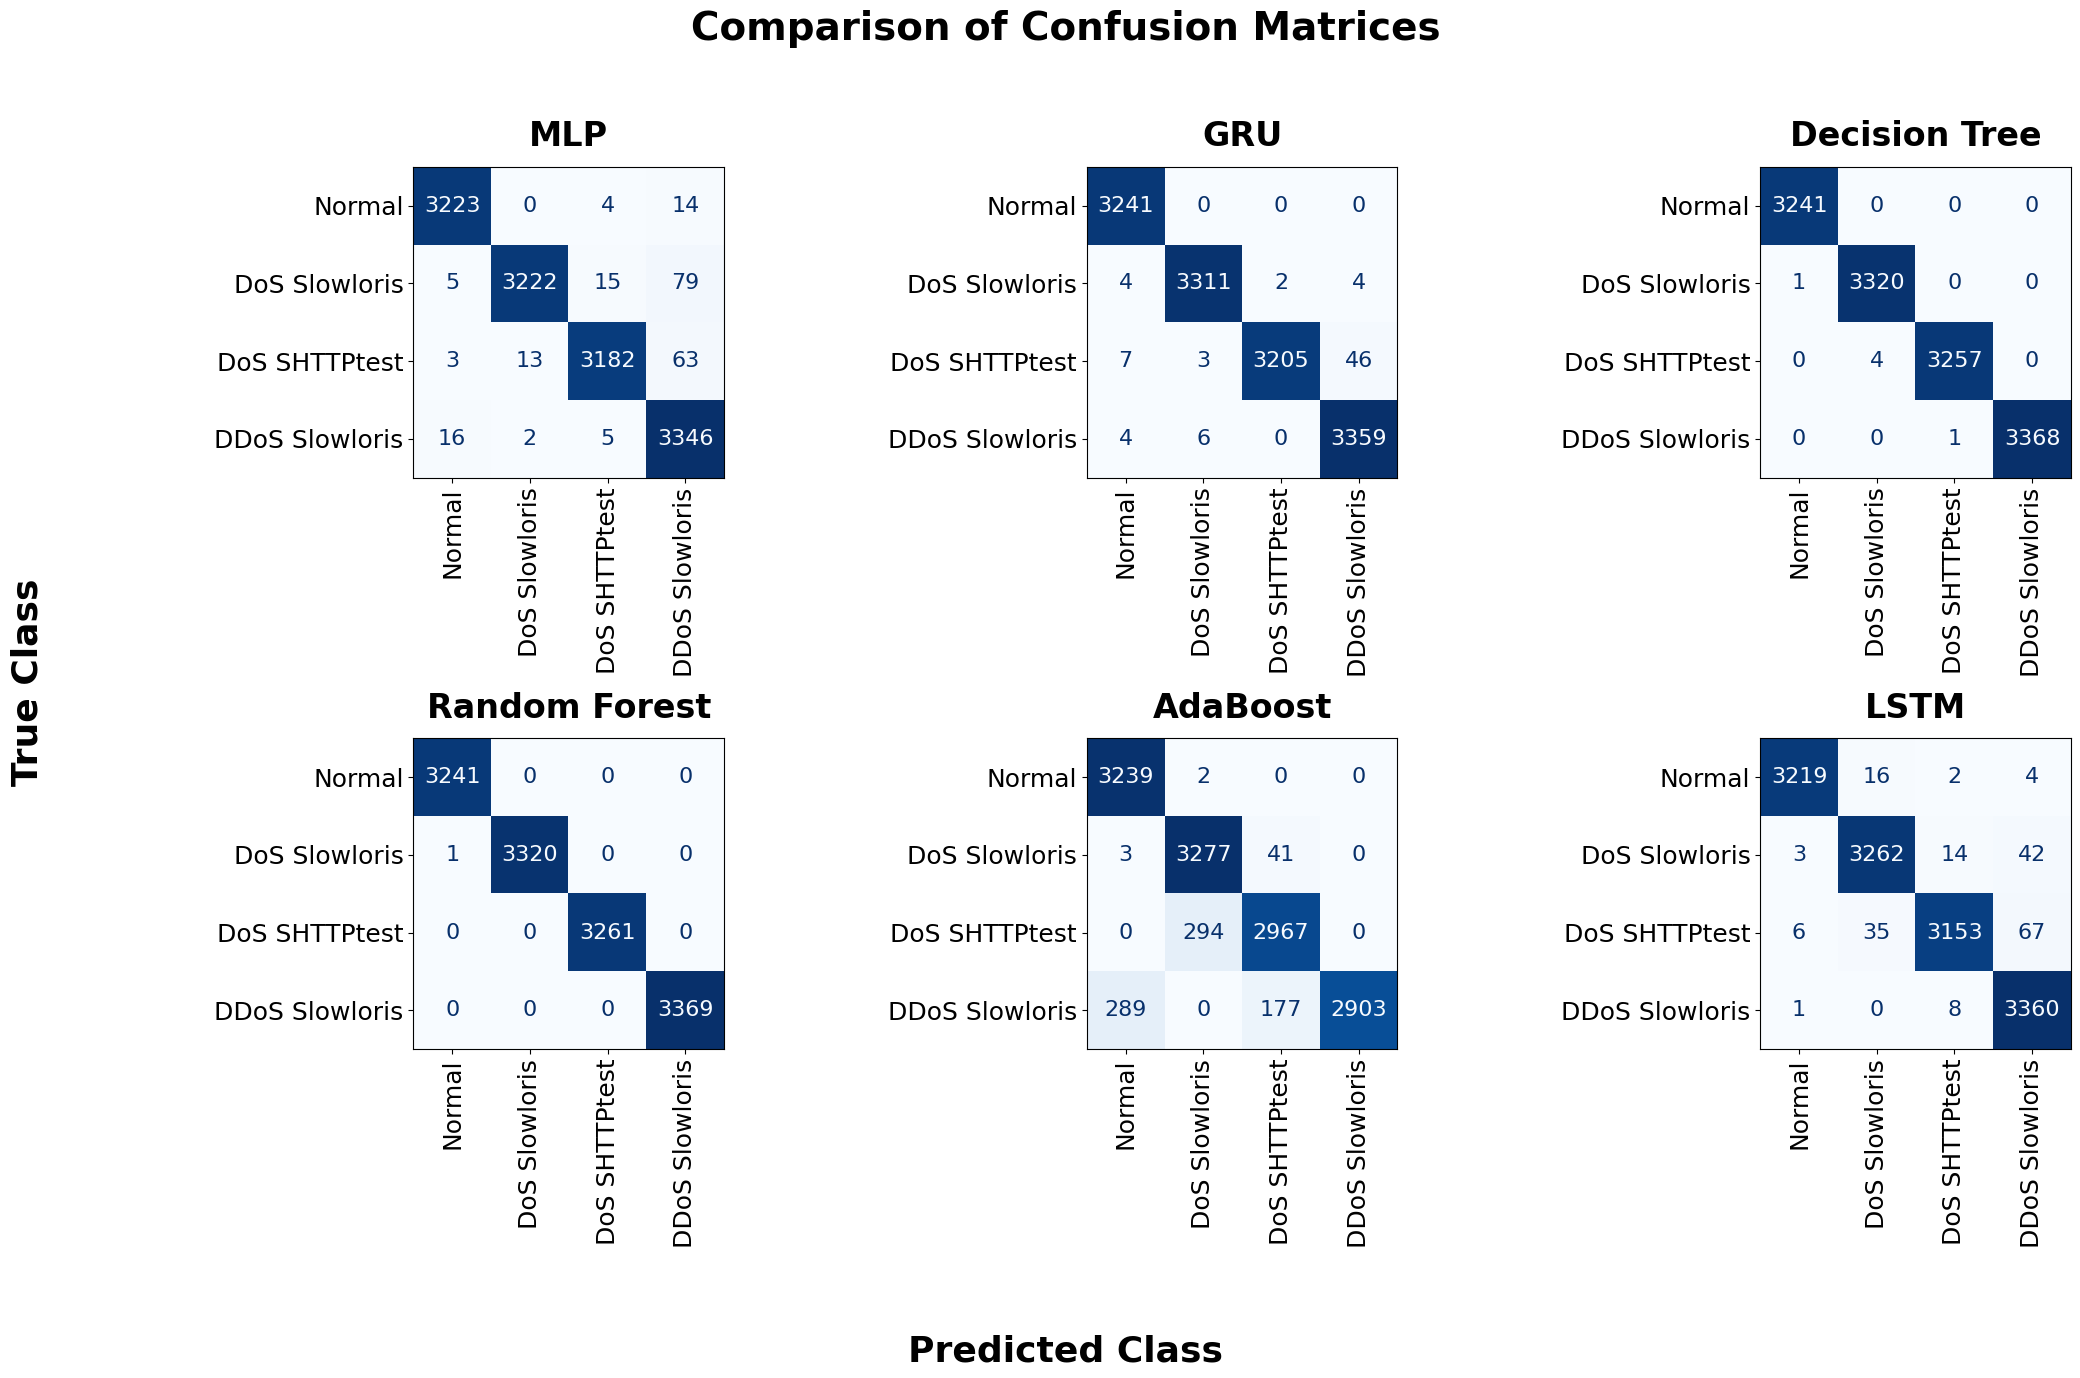

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

modelos = {
    "MLP": modelMLP,
    "GRU": modelGRU,
    "Decision Tree": modelDT,
    "Random Forest": modelRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM
}

nomes_classes = ['Normal', 'DoS Slowloris', 'DoS SHTTPtest', 'DDoS Slowloris']

predicoes = {}

for nome, modelo in modelos.items():
    if nome in ["LSTM", "GRU"]:
        y_pred_probs = modelo.predict(x_test_lstm, verbose=0)
        predicoes[nome] = np.argmax(y_pred_probs, axis=1)
    else:
        predicoes[nome] = modelo.predict(x_test)

fig, axes = plt.subplots(2, 3, figsize=(22, 14))

y_true_labels_1d = np.squeeze(y_test_lstm)

for ax, (nome_modelo, modelo) in zip(axes.ravel(), modelos.items()):
    if hasattr(modelo, 'classes_'):
        model_classes = modelo.classes_
    else:
        model_classes = np.arange(len(nomes_classes))

    cm = confusion_matrix(y_true_labels_1d, predicoes[nome_modelo], labels=model_classes)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nomes_classes)

    disp.plot(ax=ax, cmap='Blues', colorbar=False, xticks_rotation='vertical')

    for text in disp.text_.ravel():
        text.set_fontsize(16)

    ax.tick_params(axis='both', which='major', labelsize=18)

    ax.set_title(f"{nome_modelo}", fontsize=24, fontweight='bold', pad=15)

    ax.set_xlabel('')
    ax.set_ylabel('')

fig.supxlabel('Predicted Class', fontsize=26, fontweight='bold')
fig.supylabel('True Class', fontsize=26, fontweight='bold')
fig.suptitle("Comparison of Confusion Matrices", fontsize=28, fontweight='bold', y=0.98)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()

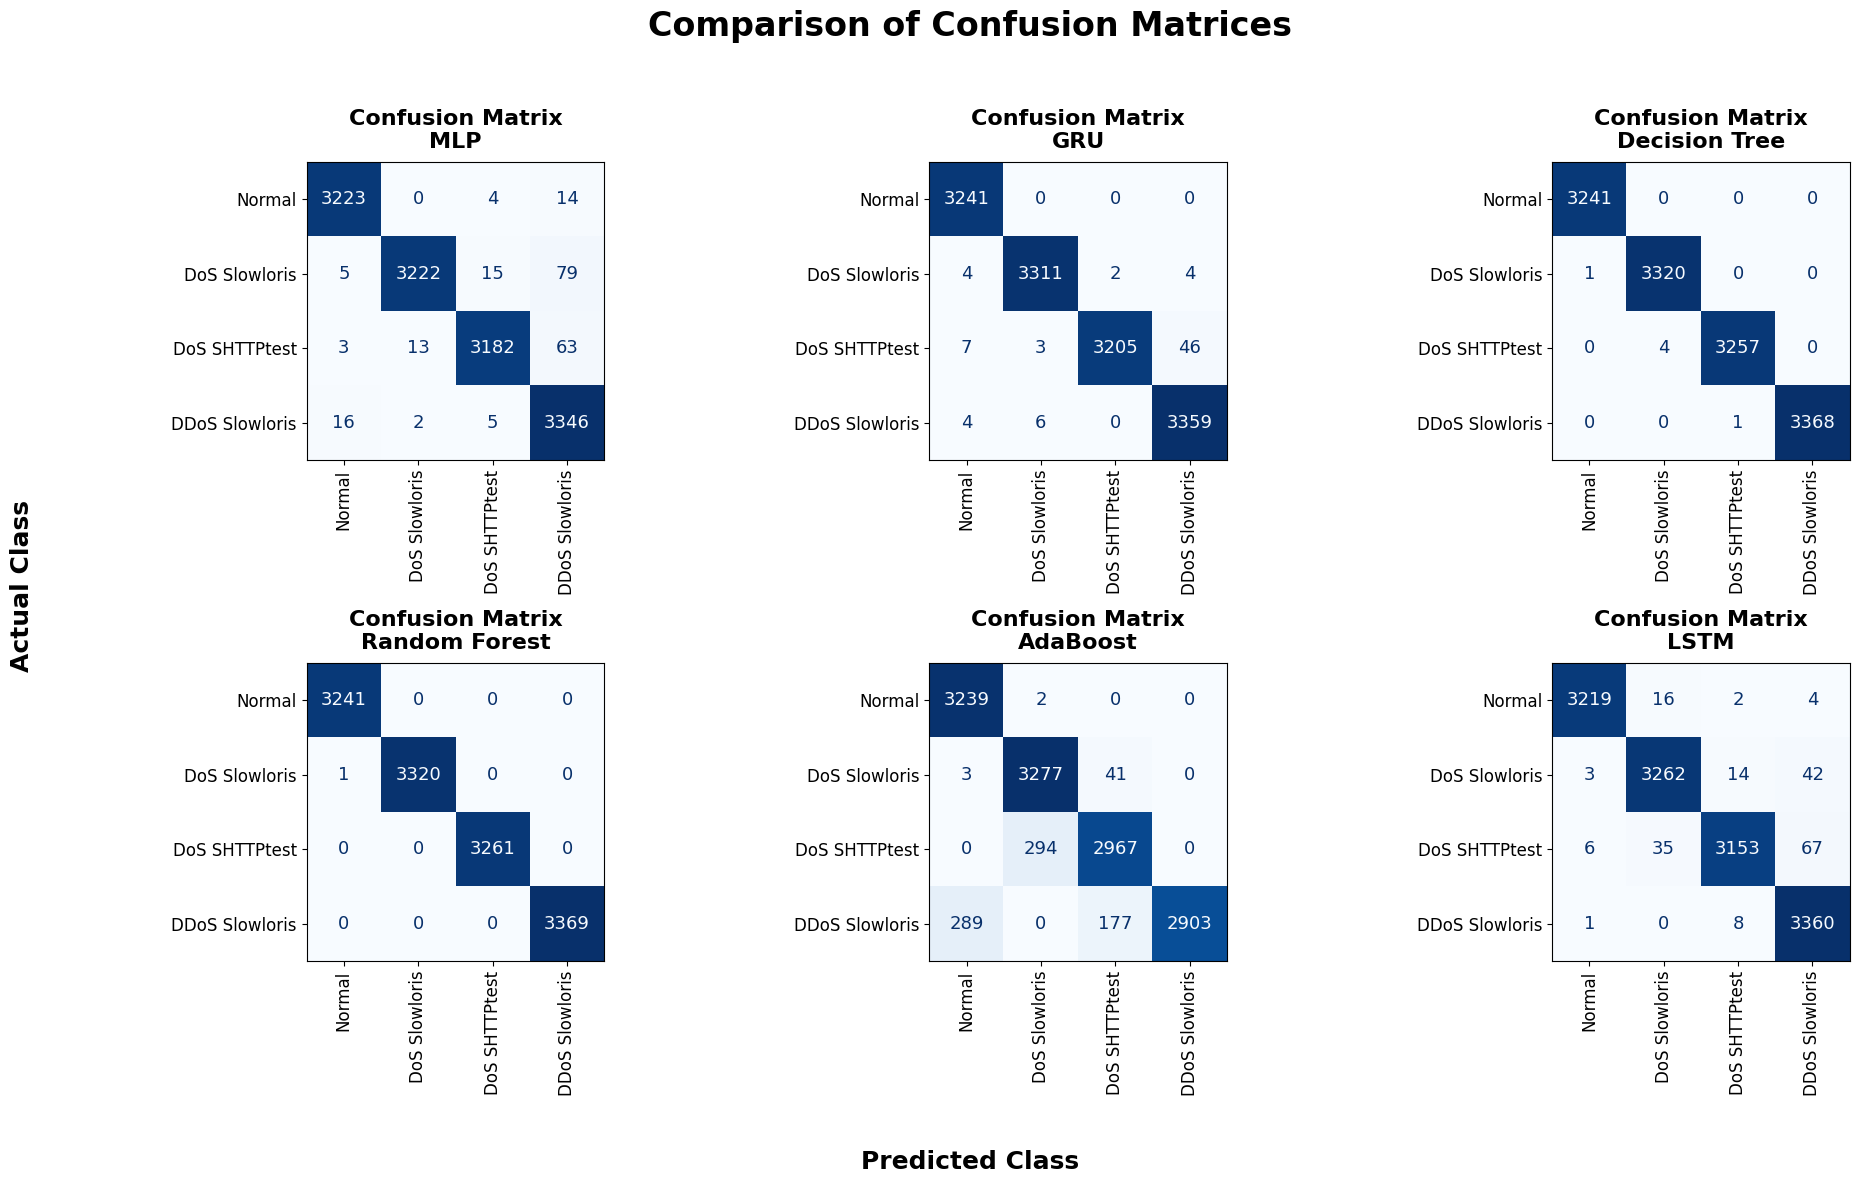

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

modelos = {
    "MLP": modelMLP,
    "GRU": modelGRU,
    "Decision Tree": modelDT,
    "Random Forest": modelRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM
}

nomes_classes = ['Normal', 'DoS Slowloris', 'DoS SHTTPtest', 'DDoS Slowloris']
y_true_labels_1d = np.squeeze(y_test_lstm)

predicoes = {}
for nome, modelo in modelos.items():
    if nome in ["LSTM", "GRU"]:
        y_pred_probs = modelo.predict(x_test_lstm, verbose=0)
        predicoes[nome] = np.argmax(y_pred_probs, axis=1)
    else:
        predicoes[nome] = modelo.predict(x_test_sklearn)


fig, axes = plt.subplots(2, 3, figsize=(20, 12)) # Aumentado levemente para acomodar as fontes

for ax, (nome_modelo, modelo) in zip(axes.ravel(), modelos.items()):

    if hasattr(modelo, 'classes_'):
        model_classes = modelo.classes_
    else:
        model_classes = np.arange(len(nomes_classes))

    cm = confusion_matrix(y_true_labels_1d, predicoes[nome_modelo], labels=model_classes)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nomes_classes)
    disp.plot(ax=ax, cmap='Blues', colorbar=False, xticks_rotation='vertical')

    ax.set_title(f"Confusion Matrix\n{nome_modelo}", fontsize=16, fontweight='bold', pad=10)

    ax.tick_params(axis='both', which='major', labelsize=12)

    for text in disp.text_.ravel():
        text.set_fontsize(13) 

    ax.set_xlabel('')
    ax.set_ylabel('')


fig.supxlabel('Predicted Class', fontsize=18, fontweight='bold')
fig.supylabel('Actual Class', fontsize=18, fontweight='bold')
fig.suptitle("Comparison of Confusion Matrices", fontsize=24, fontweight='bold', y=0.98)

plt.tight_layout(rect=[0.03, 0.03, 1, 0.95]) 
plt.show()

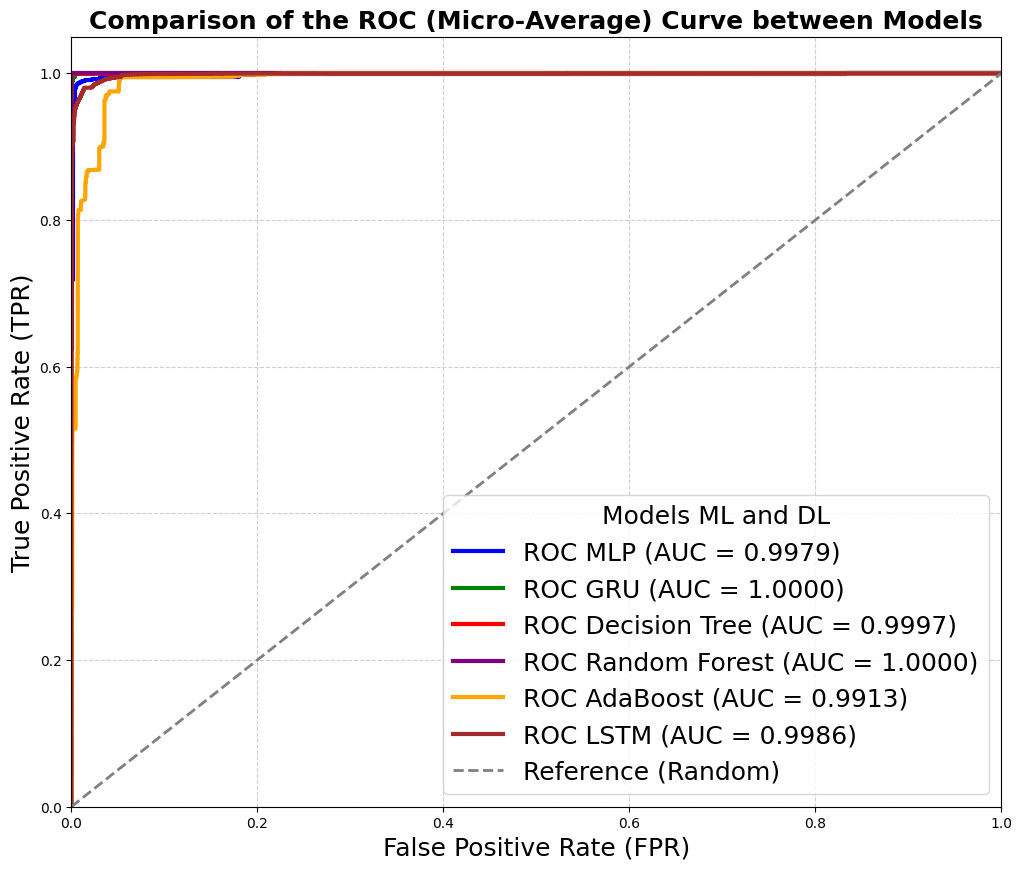

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import logging

logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

modelos = {
    "MLP": modelMLP,
    "GRU": model_gru, 
    "Decision Tree": modelDT,
    "Random Forest": modelRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM,
}

x_test_sklearn = x_test
x_test_lstm = x_test_lstm
y_test_reais = y_test

class_names = np.unique(y_test_reais)
y_test_bin = label_binarize(y_test_reais, classes=class_names)

plt.figure(figsize=(12, 10))

cores = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

for i, (nome_modelo, modelo) in enumerate(modelos.items()):

    y_pred_prob = None

    if nome_modelo in ["LSTM", "GRU"]:
        y_pred_prob = modelo.predict(x_test_lstm, verbose=0)
    elif hasattr(modelo, 'predict_proba'):
        y_pred_prob = modelo.predict_proba(x_test_sklearn)
    else:
        logging.warning(f"O modelo {nome_modelo} foi ignorado por não possuir método de probabilidades.")
        continue
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr,
        tpr,
        color=cores[i % len(cores)], 
        lw=3, 
        label=f'ROC {nome_modelo} (AUC = {roc_auc:.4f})' 
    )

plt.plot(
    [0, 1],
    [0, 1],
    color='gray',
    lw=2,
    linestyle='--',
    label='Reference (Random)'
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=18)
plt.ylabel('True Positive Rate (TPR)', fontsize=18)
plt.title('Comparison of the ROC (Micro-Average) Curve between Models', fontsize=18, fontweight='bold')
plt.legend(loc="lower right", fontsize=18, title="Models ML and DL", title_fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

/tmp/ipython-input-664070267.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-664070267.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-664070267.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-664070267.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

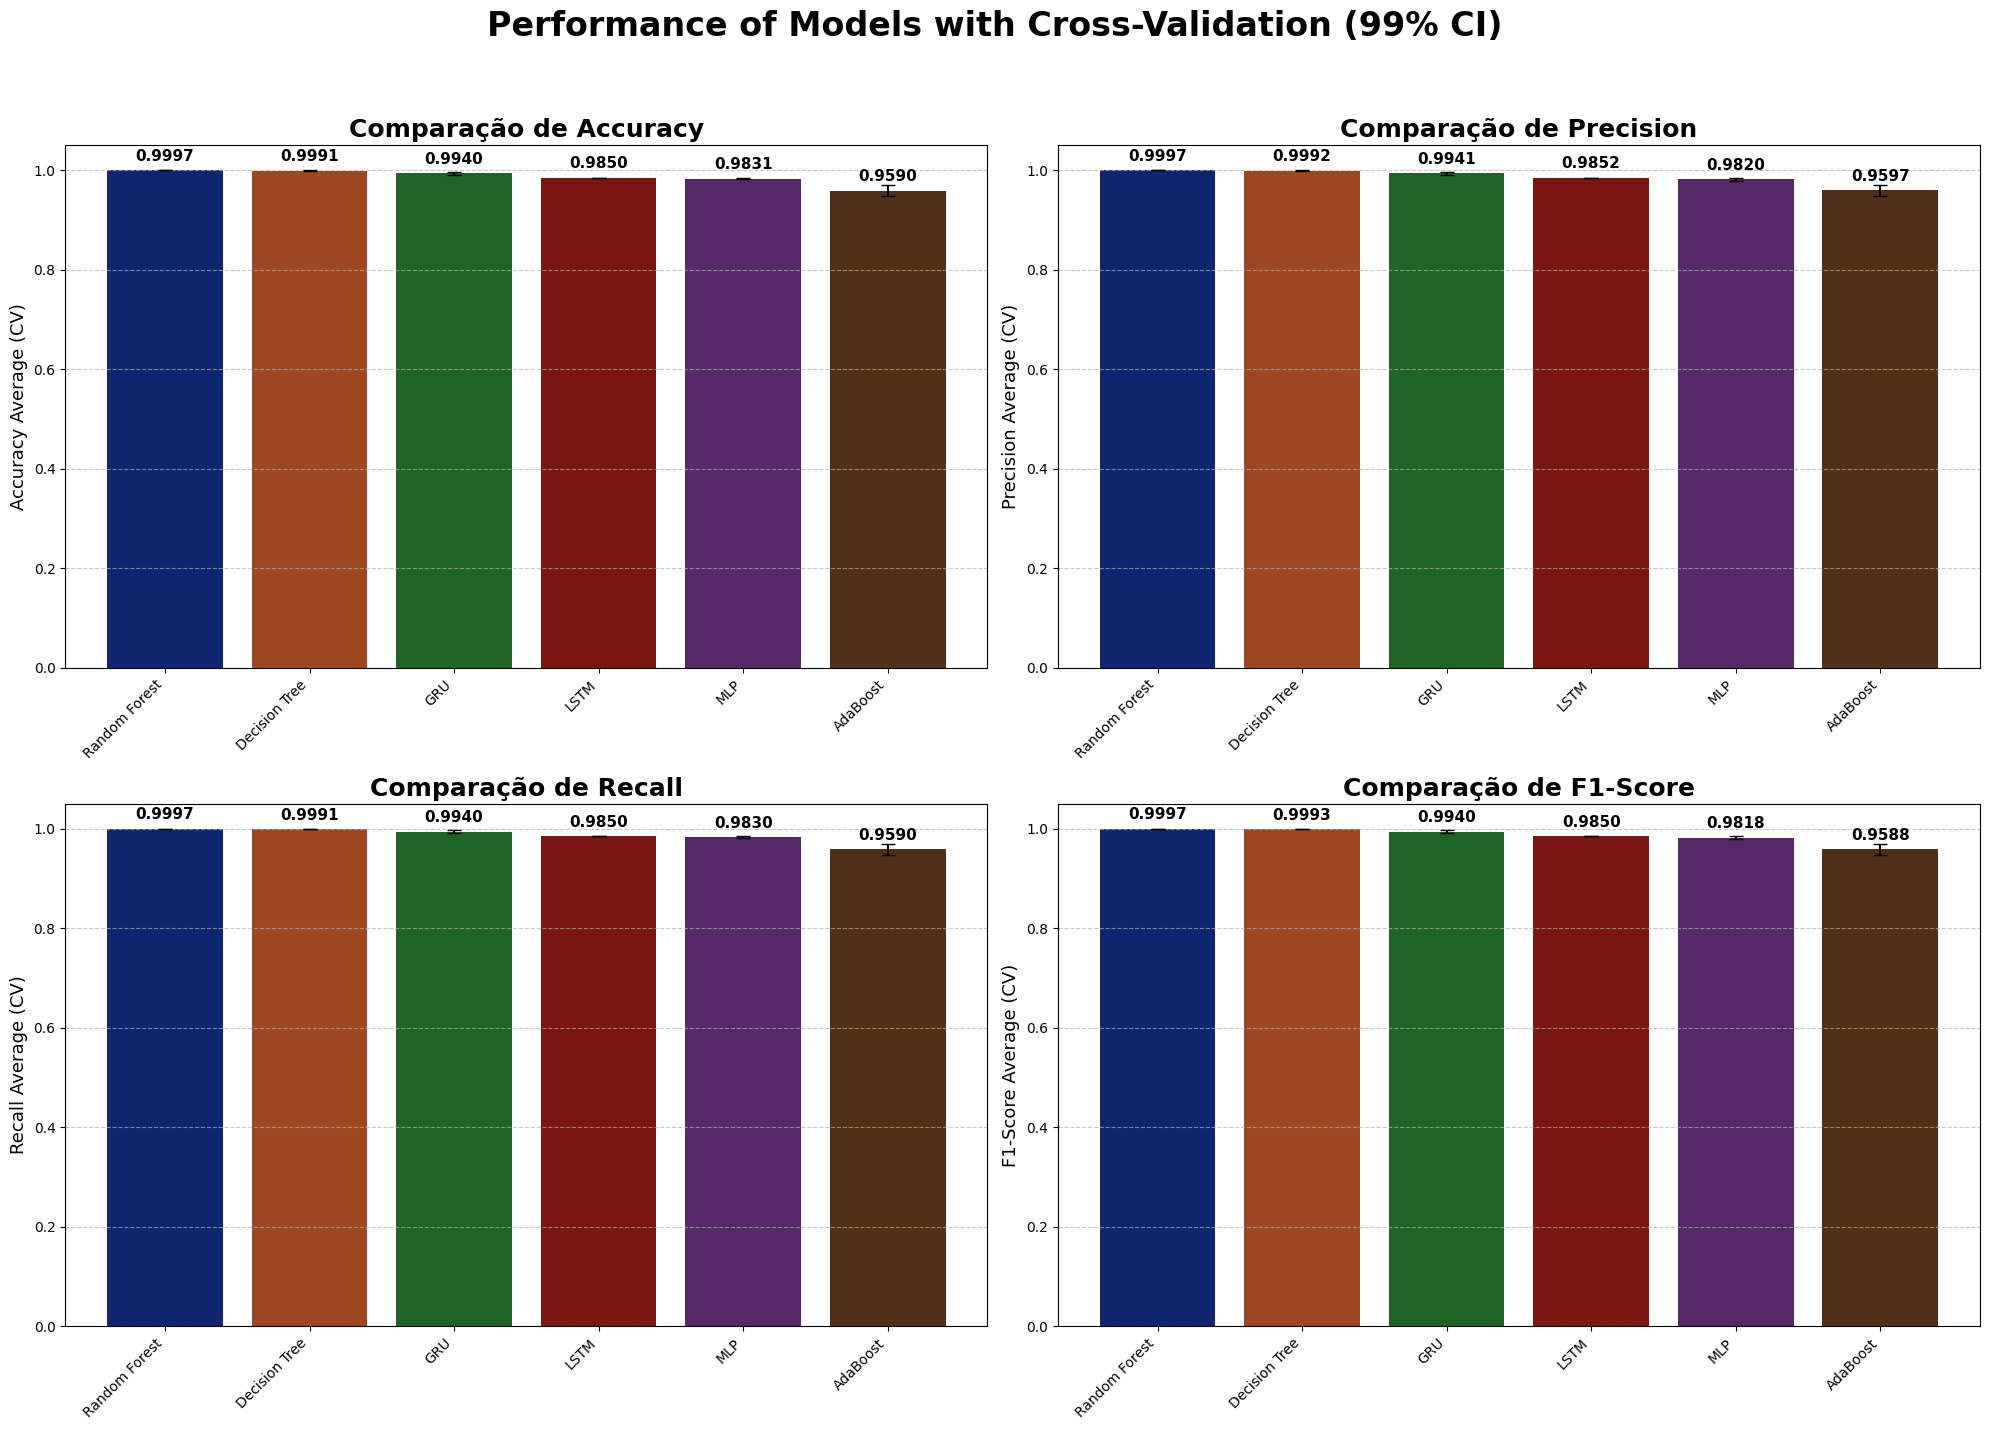

In [ ]:
import seaborn as sns
from scipy.stats import sem, t 
def calcular_ic_95(dados):

    dados = np.array(dados)

    if dados.size < 2:
        return 0
    return t.ppf(0.995, dados.size - 1) * sem(dados)

metricas_a_plotar = ["Accuracy", "Precision", "Recall", "F1-Score"]
scores_globais = all_scores_cv

plt.figure(figsize=(20, 15))

for i, metrica in enumerate(metricas_a_plotar, 1):
    plt.subplot(2, 2, i) 

    scores_da_metrica_atual = scores_globais[metrica]

    dados_plot = []

    for nome_modelo, scores in scores_da_metrica_atual.items():

        scores = np.array(scores)
        if scores.size == 0:
             continue

        media = np.mean(scores)
        ic = calcular_ic_95(scores) 
        dados_plot.append({"Algoritmo": nome_modelo, "Média": media, "IC": ic})

    if not dados_plot:
        plt.title(f"Dados indisponíveis para {metrica}", fontsize=16)
        continue

    df_plot = pd.DataFrame(dados_plot).sort_values(by="Média", ascending=False)

    ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")

    plt.errorbar(x=df_plot["Algoritmo"], y=df_plot["Média"], yerr=df_plot["IC"],
                 fmt='none', c='black', capsize=5, lw=1.5)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points', fontsize=11, fontweight='bold')


    plt.title(f"Comparação de {metrica}", fontsize=18, fontweight='bold')
    plt.ylim(0, 1.05) 
    plt.xlabel(None)
    plt.ylabel(f"{metrica} Average (CV)", fontsize=13)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Performance of Models with Cross-Validation (99% CI)", fontsize=24, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta o layout para o super-título caber
plt.show()

/tmp/ipython-input-4107974264.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-4107974264.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-4107974264.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-4107974264.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

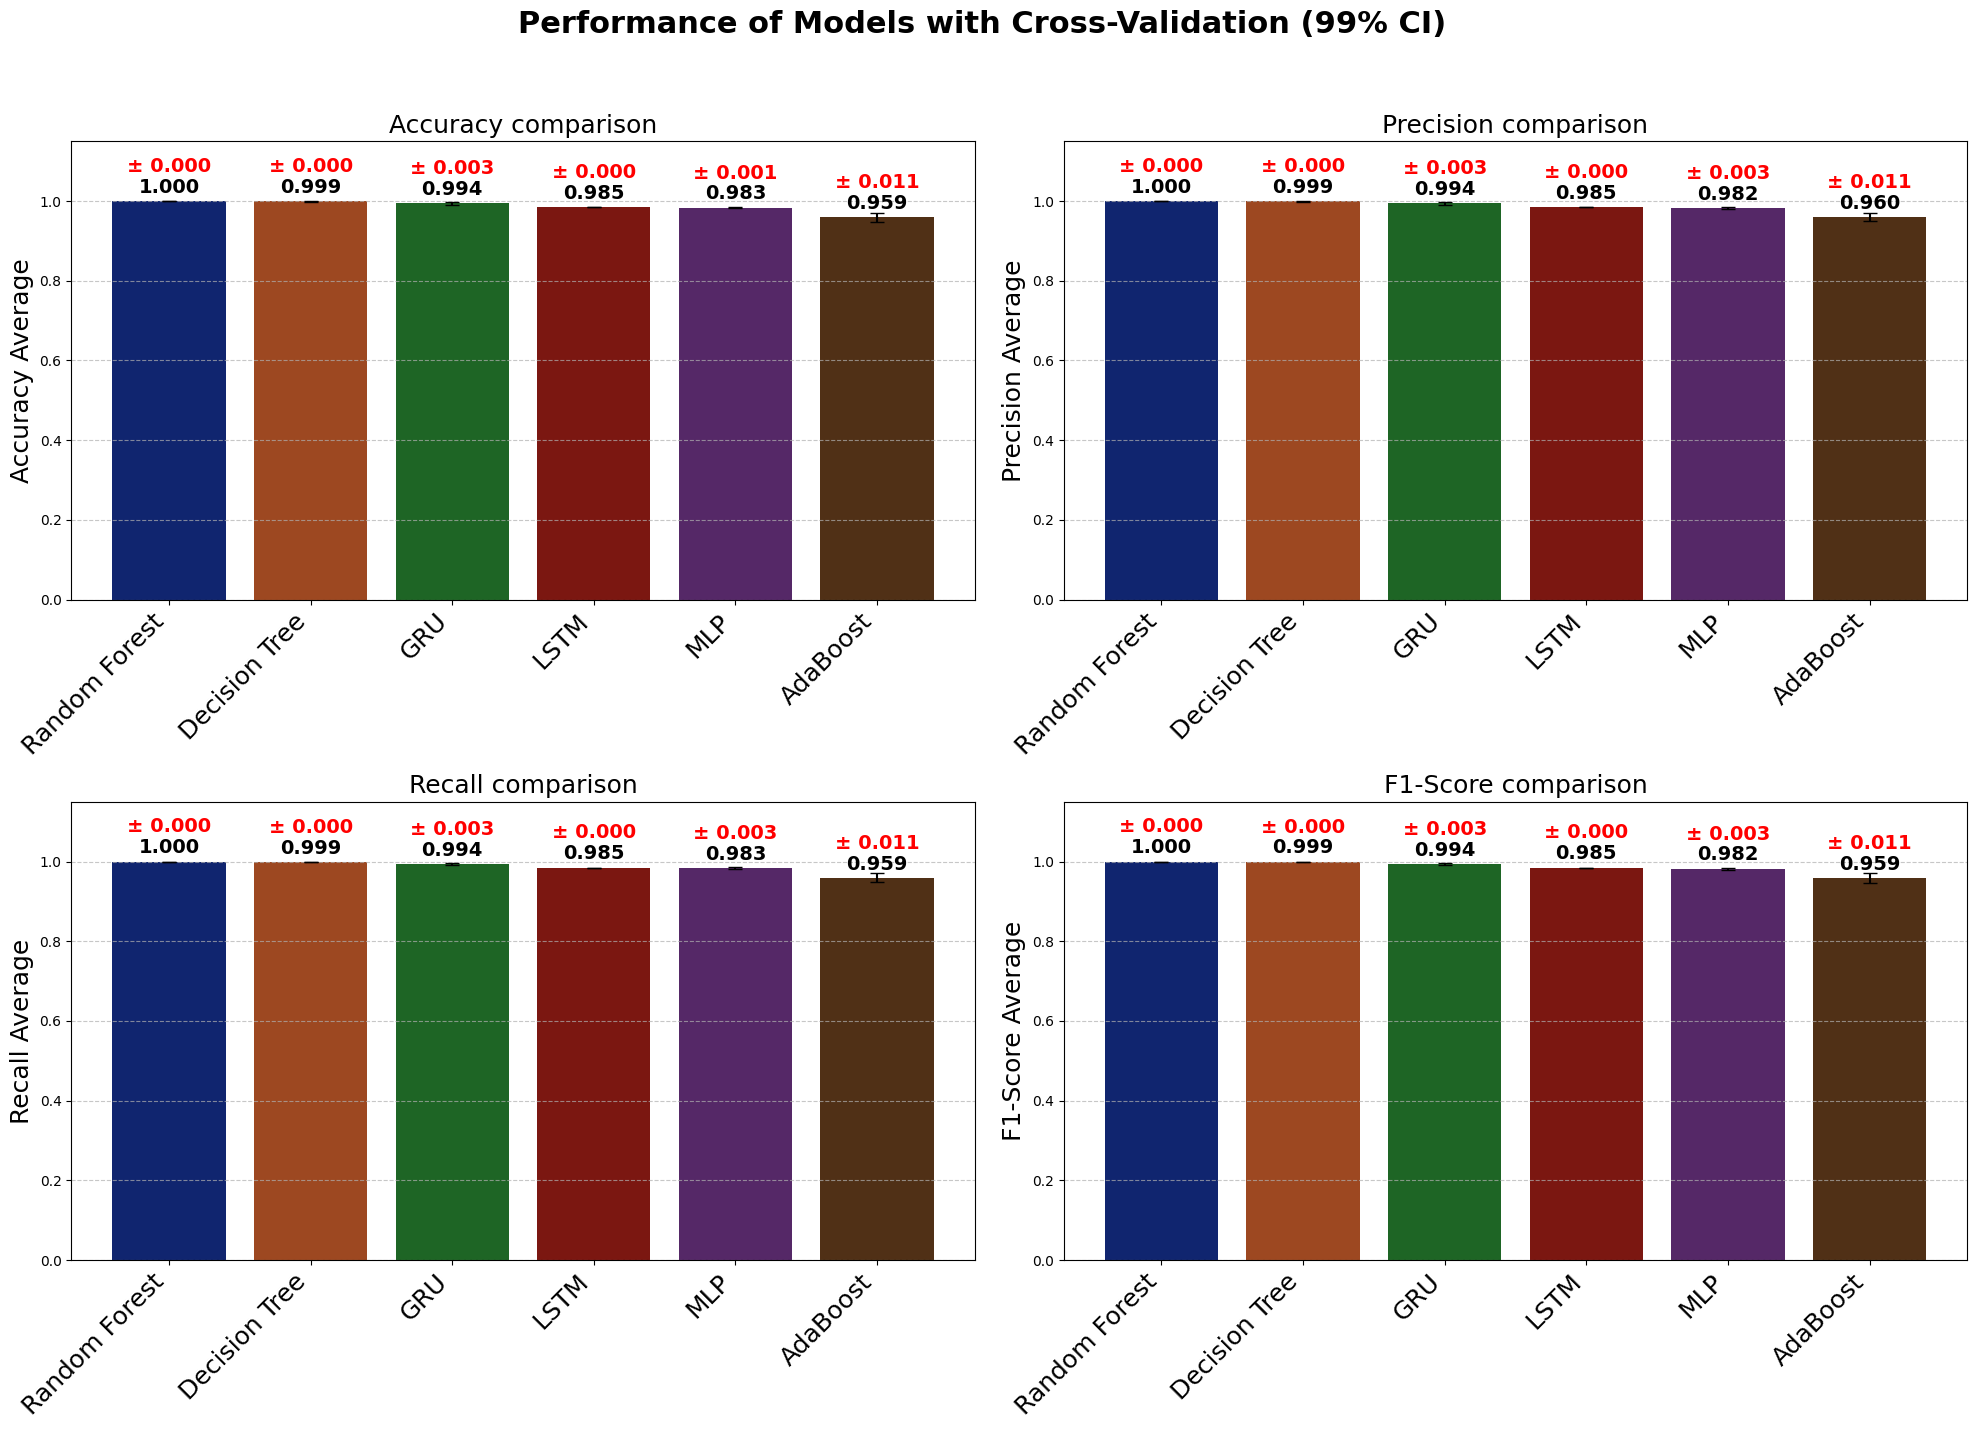

In [ ]:
metricas_a_plotar = ["Accuracy", "Precision", "Recall", "F1-Score"]

plt.figure(figsize=(20, 15))

for i, metrica in enumerate(metricas_a_plotar, 1):
    plt.subplot(2, 2, i) # Cria o i-ésimo subplot

    scores_da_metrica_atual = all_scores_cv[metrica]

    dados_plot = []
    for nome_modelo, scores in scores_da_metrica_atual.items():
        media = np.mean(scores)
        ic = calcular_ic_95(scores)
        dados_plot.append({"Algoritmo": nome_modelo, "Média": media, "IC": ic})

    df_plot = pd.DataFrame(dados_plot).sort_values(by="Média", ascending=False)

    ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")

    plt.errorbar(x=df_plot["Algoritmo"], y=df_plot["Média"], yerr=df_plot["IC"],
                 fmt='none', c='black', capsize=5)

    for j, p in enumerate(ax.patches):
        media_valor = p.get_height()

        ic_valor = df_plot['IC'].iloc[j]

        ax.annotate(f'{media_valor:.3f}',
                    (p.get_x() + p.get_width() / 2., media_valor),
                    ha='center', va='center',
                    xytext=(0, 10), textcoords='offset points',
                    fontsize=14, fontweight='bold')

        ax.annotate(f'± {ic_valor:.3f}',
                    (p.get_x() + p.get_width() / 2., media_valor), 
                    ha='center', va='center',
                    xytext=(0, 25), textcoords='offset points', 
                    fontsize=14, color='red', fontweight='bold')

    plt.title(f"{metrica} comparison", fontsize=18)
    plt.ylim(0, 1.15) 
    plt.xlabel(None)
    plt.ylabel(f"{metrica} Average", fontsize=18)
    plt.xticks(rotation=45, ha="right", fontsize=18)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Performance of Models with Cross-Validation (99% CI)", fontsize=22, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()